# Loan_Status Prediction


#### Create classification model to predict Loan will be sanctioned or not

* [Theory](#Theory)
* [Data](#Data)
* **[EDA](#EDA)**
>* [Replacing_Null_Values](#Replacing_Null_Values)
>* [Outlier_Treatment](#Outlier_Treatment)
>* [Adding_New_Columns](#Adding_New_Columns)
>* [Categorical_into_Numeric](#Categorical_into_Numeric)
* **[Visualization](#Visualization)**
* **[Statistic_Model](#Statistic_Model)**
* **[Machine_Learning](#Machine_Learning)**
>* [Train_Test_Split_without_Std_Scalling](#Train_Test_Split_without_Std_Scalling)
>>* [Logit_without_scalling](#Logit_without_scalling)
>>* [Logit_using_hyperparameters](#Logit_using_hyperparameters)
>* [Train_Test_Splitting_and_scalling](#Train_Test_Splitting_and_scalling)
>>* **[Logistic_Regression](#Logistic_Regression)**
>>>* [Without_Hyperparameters](#Without_Hyperparameters)
>>>* [Using_Hyperparameters](#Using_Hyperparameters)
>>* **[Decision_Tree_Classifier](#Decision_Tree_Classifier)**
>>>* [without_hyperparameters](#without_hyperparameters)
>>>* [using_hyperparameters](#using_hyperparameters)
>>* **[Random_Forest_Classifier](#Random_Forest_Classifier)**
>>>* [without_Hyperparameters](#without_Hyperparameters)
>>>* [using_Hyperparameters](#using_Hyperparameters)
>>* **[KNN_Classifier](#KNN_Classifier)**
>>>* [Without_hyperparameters](#Without_hyperparameters)
>>>* [Using_hyperparameters](#Using_hyperparameters)
>>* [Finding_Best_Classifier](#Finding_Best_Classifier)
* **[Final_Model](#Final_Model)**
* **[Prediction_On_Given_Data](#Prediction_On_Given_Data)**
* [](#)
* [](#)
* [](#)

<a id='Theory'></a>

## Theory

#### Income 
       Basic Elemntto to determine loans interest rates
       resposible people with high disposable income have a greater repayment capacity than lower income
       peope with high and stable disposable income tend to obtain lower interest rates on loan

#### Credit Score
       Credit Score Reflects overall financial health of a person in terms income, existing debt, borrowing behaviour, past repayment history
       Higher credit score amplifies the level of trust. Usually a score moe than 750 is considered to be a good CIBIL score
        
#### Employer's Status
       Since Personal Loans are unsecured lenders look out for if borrower is employed by a well known organisation

#### Debt-to-income Ratio
        all debt payment/total Income
        higher debt-to income ratio more burden tends to higher interest rate

#### History of defaults
        prefers 0 defaults over past 12 months
        
#### Tenure
         the total duration of time over which you spread your loan EMI payments to pay off the entire loan amount

    
#### existing EMI's Monthly Income, Interest rate and tenure, coapplicant(considers repayment capacity and credit score of both), Property Area   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('D:\\Dataset\\train.csv')

In [3]:
df.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

<a id='Data'></a>
## Data

This Data Has information about applicant's
* Loan_ID  
* Sex: Male/Female
* Marital status: Yes/No
* No of Dependents: 0,1,2,3+
* Eduaction Status: Graduate/ Not Graduate
* Self Employed: Employed/Self Employed
* Income: Income Of apllicant   in Rs
* Coapplicant Income    in Rs
* Loan Amount is in thousand rs(1000 Rs)
* Tenure
* Credit History 
* Property Area Rural/Urban/Semiurban


* We can Create Extra feature by adding applicant's and co-applicant's income and to make unit same to Loan_amount we have to divide it by 1000

* Let's Suppose bank has average interest rate of 10% if its applied we can also check the remaining balance from total income and analyse if applicant is able to pay the loan amount with 10% interest.

* So we have to create new columns as
       @ Total income= income + coapplicant income
          but we have to change its unit
        @ Total Income in 1000 = (income+coapplicant income)/1000
       
       EMI=P*r*[(1+r)^n/(1+r)^n-1]     P:Principal Amount  r-rate of interest n number of months 
       
       @ EMI = Loan_amount*r*[(((1+r)**Tenure)/((1+r)**Tenure)-1)]    where r=10/(12*100) interest rate per month
       
       Here we are assuming rate of interest is 10%    Here n=Tenure
       so r=0.0083
       
       @ Balance = Total Income - EMI

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Sex                 601 non-null    object 
 2   Marital_Status      611 non-null    object 
 3   No_Dependents       599 non-null    object 
 4   Education_Status    614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Income              614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Tenure              600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.duplicated().sum()

0

<a id='Replacing_Null_Values'></a>
### Finding Null Values and Replacing 
>If feature type is categorical replacing them with mode and if its numeric replacing with mean value

In [7]:
df.isna().sum()

Loan_ID                0
Sex                   13
Marital_Status         3
No_Dependents         15
Education_Status       0
Self_Employed         32
Income                 0
Coapplicant_Income     0
Loan_Amount           22
Tenure                14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

No duplicated values but
Found null values
we can drop them but it'll drop entire row so 
* we are going to replace numeric values with mean and categorical value to mode

In [8]:
df['Sex'].fillna(df['Sex'].mode()[0],inplace=True)       # 0  is to select first 
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0],inplace=True)
df['No_Dependents'].fillna(df['No_Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df['Tenure'].fillna(df['Tenure'].mean(),inplace=True)

In [9]:
df.isna().sum()

Loan_ID               0
Sex                   0
Marital_Status        0
No_Dependents         0
Education_Status      0
Self_Employed         0
Income                0
Coapplicant_Income    0
Loan_Amount           0
Tenure                0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

* No null value

<a id='Outlier_Treatment'></a>
### Outlier Treatment

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
Loan_Amount,614.0,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Tenure,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


In [11]:
INC=np.percentile(df['Income'],q=[25,75])
print("Income",'\n','Q1 = ',INC[0],'Q3 = ',INC[1])
Income_q1=INC[0]
Income_q3=INC[1]
IQR_Income=Income_q3-Income_q1
print('IQR =',IQR_Income)
upper_income=Income_q3+(1.5*IQR_Income)
lower_income=Income_q1-(1.5*IQR_Income)
print('Upper Bound: ',upper_income,'Lower Bound: ',lower_income)

Income 
 Q1 =  2877.5 Q3 =  5795.0
IQR = 2917.5
Upper Bound:  10171.25 Lower Bound:  -1498.75


In [12]:
df[(df['Income']>upper_income) | (df['Income']<lower_income)].head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,120.0,360.0,1.0,Urban,Y


In [13]:
len(df[(df['Income']>upper_income) | (df['Income']<lower_income)])

50

In [14]:
len(df[(df['Income']>upper_income)])

50

In [15]:
np.percentile(df['Income'],q=[90])

array([9459.9])

In [16]:
def outlier_Income(Inc):
    if Inc>upper_income:
        return(9459.9)
    else:
        return(Inc)

In [17]:
df['Income']= df.apply(lambda x: outlier_Income(x.Income), axis = 1)


In [18]:
#df[(df['Income']>upper_income)]=9459.9

In [19]:
len(df[(df['Income']>upper_income) | (df['Income']<lower_income)])

0

* outliers in income are 50 which are greater than its upper bound so replaced them with 90th percentile of income.

In [20]:
co_INC=np.percentile(df['Coapplicant_Income'],q=[25,75])
print('Coapplicant Income','\n','Q1 = ',co_INC[0],'\n','Q3 = ',co_INC[1])
print('\n')
Coapplicant_Income_q1=co_INC[0]
Coapplicant_Income_q3=co_INC[1]
IQR_co_Income=Coapplicant_Income_q3-Coapplicant_Income_q1
print("IQR = ",IQR_co_Income)
upper_co_income=Coapplicant_Income_q3+(1.5*IQR_co_Income)
lower_co_income=Coapplicant_Income_q1-(1.5*IQR_co_Income)
print('Upper Bound =',upper_co_income,'Lower Bound=',lower_co_income)

Coapplicant Income 
 Q1 =  0.0 
 Q3 =  2297.25


IQR =  2297.25
Upper Bound = 5743.125 Lower Bound= -3445.875


In [21]:
df[(df['Coapplicant_Income']>upper_co_income) | (df['Coapplicant_Income']<lower_co_income)]

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,9459.9,10968.0,349.0,360.0,1.000000,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.000000,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166.0,7210.0,184.0,360.0,1.000000,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137.0,8980.0,137.0,360.0,0.000000,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000.0,7750.0,290.0,360.0,1.000000,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516.0,11300.0,495.0,360.0,0.000000,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400.0,7250.0,180.0,360.0,0.000000,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661.0,7101.0,279.0,180.0,1.000000,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625.0,6250.0,187.0,360.0,1.000000,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323.0,7873.0,380.0,300.0,1.000000,Rural,Y


In [22]:
len(df[(df['Coapplicant_Income']>upper_co_income) | (df['Coapplicant_Income']<lower_co_income)])

18

In [23]:
len(df[(df['Coapplicant_Income']>upper_co_income)])

18

In [24]:
len(df[(df['Coapplicant_Income']<lower_co_income)])

0

In [25]:
np.percentile(df['Coapplicant_Income'],q=[90])

array([3782.2])

In [26]:
def outlier_coIncome(coInc):
    if coInc>upper_co_income:
        return(3782.2)
    else:
        return(coInc)

In [27]:
df['Coapplicant_Income']= df.apply(lambda x: outlier_coIncome(x.Coapplicant_Income), axis = 1)


In [28]:
#df[(df['Coapplicant_Income']>upper_co_income)]=7196.8

In [29]:
len(df[(df['Coapplicant_Income']>upper_co_income) | (df['Coapplicant_Income']<lower_co_income)])

0

* outliers of coapplicant income are 18 which are greater than its upper bound so replaced them with its 90th percentile

In [30]:
T90=np.percentile(df['Tenure'],q=[25,75])
print('Tenure','Q1=',T90[0],'Q3=',T90[1])
Tenure_q1=T90[0]
Tenure_q3=T90[1]
IQR_Tenure=Tenure_q3-Tenure_q1
print('IQR: ',IQR_Tenure)
upper_Tenure=Tenure_q3+(1.5*IQR_Tenure)
lower_Tenure=Tenure_q1-(1.5*IQR_Tenure)
print('Upper Bound:',upper_Tenure,'Lower Bound:',lower_Tenure)

Tenure Q1= 360.0 Q3= 360.0
IQR:  0.0
Upper Bound: 360.0 Lower Bound: 360.0


In [31]:
len(df[(df['Tenure']>upper_Tenure) | (df['Tenure']<lower_Tenure)])

102

* no outliers in Tenure

In [32]:
CH=np.percentile(df['Credit_History'],q=[25,75])
print('Credit History','Q1=',CH[0],'Q3=',CH[1])

Credit_History_q1=CH[0]
Credit_History_q3=CH[1]
IQR_Credit_History=Credit_History_q3-Credit_History_q1
print('IQR: ',IQR_Credit_History)

upper_Credit_History=Credit_History_q3+(1.5*IQR_Credit_History)
lower_Credit_History=Credit_History_q1-(1.5*IQR_Credit_History)
print('Upper Bound:',upper_Credit_History,'Lower Bound:',lower_Credit_History)

Credit History Q1= 1.0 Q3= 1.0
IQR:  0.0
Upper Bound: 1.0 Lower Bound: 1.0


In [33]:
len(df[(df['Credit_History']>upper_Credit_History) | (df['Credit_History']<lower_Credit_History)])

139

* no outliers in credit history

In [34]:
LA=np.percentile(df['Loan_Amount'],q=[25,75])
print('Loan_Amount','Q1=',LA[0],'Q3=',LA[1])

Loan_Amount_q1=LA[0]
Loan_Amount_q3=LA[1]
IQR_Loan_Amount=Loan_Amount_q3-Loan_Amount_q1
print('IQR: ',IQR_Loan_Amount)

upper_Loan_Amount=Loan_Amount_q3+(1.5*IQR_Loan_Amount)
lower_Loan_Amount=Loan_Amount_q1-(1.5*IQR_Loan_Amount)
print('Upper Bound:',upper_Loan_Amount,'Lower Bound:',lower_Loan_Amount)

Loan_Amount Q1= 100.25 Q3= 164.75
IQR:  64.5
Upper Bound: 261.5 Lower Bound: 3.5


In [35]:
len(df[(df['Loan_Amount']>upper_Loan_Amount) | (df['Loan_Amount']<lower_Loan_Amount)])

41

<a id='Adding_New_Columns'></a>
### Adding New Columns   

In [36]:
#now we are creating new features as total income,EMI and Balance

In [37]:
df['TOT_INC']=(df['Income']+df['Coapplicant_Income'])

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,614.0,4559.184039,2354.368874,150.0,2877.50,3812.5,5795.00,10139.0
Coapplicant_Income,614.0,1362.215831,1500.352533,0.0,0.00,1188.5,2297.25,5701.0
Loan_Amount,614.0,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Tenure,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0
TOT_INC,614.0,5921.399870,2455.574976,1442.0,4166.00,5394.5,7250.25,14725.9


In [39]:
df['Loan_Amount']=df['Loan_Amount']*1000

In [40]:
r=10/(12*100)
r

0.008333333333333333

In [41]:
def E_M_I(P,n,r):
    EMI=(P*r*(((1+r)**n)/(((1+r)**n)-1)))
    return(EMI)

In [42]:
df['EMI']  = df.apply(lambda x: E_M_I(x.Loan_Amount,x.Tenure,r), axis = 1)

In [43]:
df['Balance']=df['TOT_INC']-df['EMI']

In [44]:
df.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,TOT_INC,EMI,Balance
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,120000.0,360.0,1.0,Urban,Y,5849.0,1053.085884,4795.914116
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128000.0,360.0,1.0,Rural,N,6091.0,1123.291610,4967.708390
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000.0,360.0,1.0,Urban,Y,3000.0,579.197236,2420.802764
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000.0,360.0,1.0,Urban,Y,4941.0,1053.085884,3887.914116
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141000.0,360.0,1.0,Urban,Y,6000.0,1237.375914,4762.624086


In [45]:
df['Balance']=df['Balance'].astype(int)
df['EMI']=df['EMI'].astype(int)

In [46]:
df=df[['Sex','Marital_Status','No_Dependents','Education_Status','Self_Employed','Property_Area','TOT_INC','Loan_Amount','Credit_History','Tenure','EMI','Balance','Loan_Status']]

TOT_INC (Total Income) is sum of Income and Coapplicant's income
* so they are totally dependant 
* hence dropped Icome and Coapplicant Income Columns

In [47]:
df.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance,Loan_Status
0,Male,No,0,Graduate,No,Urban,5849.0,120000.0,1.0,360.0,1053,4795,Y
1,Male,Yes,1,Graduate,No,Rural,6091.0,128000.0,1.0,360.0,1123,4967,N
2,Male,Yes,0,Graduate,Yes,Urban,3000.0,66000.0,1.0,360.0,579,2420,Y
3,Male,Yes,0,Not Graduate,No,Urban,4941.0,120000.0,1.0,360.0,1053,3887,Y
4,Male,No,0,Graduate,No,Urban,6000.0,141000.0,1.0,360.0,1237,4762,Y


In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TOT_INC,614.0,5921.399870,2455.574976,1442.0,4166.0,5394.5,7250.25,14725.9
Loan_Amount,614.0,145465.798046,84180.967010,9000.0,100250.0,125000.0,164750.00,700000.0
Credit_History,614.0,0.842199,0.349681,0.0,1.0,1.0,1.00,1.0
Tenure,614.0,342.000000,64.372489,12.0,360.0,360.0,360.00,480.0
EMI,614.0,1334.011401,859.303788,78.0,896.0,1123.0,1509.00,9758.0
Balance,614.0,4586.394137,2100.117931,-2276.0,3150.0,4147.5,5670.50,13156.0


* mean Loan_amount is 146412  minimum applied loan amount is 9000 maximum is 70000
* minimum Total income is 1442 where maximum is 81000

___

<a id='Categorical_into_Numeric'></a>

### Changing Categorical Values into Numeric

Now We Have To Change Categorical Data In Numeric

In [49]:
df['Sex'].value_counts()

Male      502
Female    112
Name: Sex, dtype: int64

In [50]:
df.groupby('Sex')['Loan_Status'].value_counts()


Sex     Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

In [51]:
df['Marital_Status'].value_counts()

Yes    401
No     213
Name: Marital_Status, dtype: int64

In [52]:
df['No_Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: No_Dependents, dtype: int64

In [53]:
df['Education_Status'].value_counts()

Graduate        480
Not Graduate    134
Name: Education_Status, dtype: int64

In [54]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [55]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [56]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [57]:
df['Sex'].replace({'Male':1,'Female':0},inplace=True)

df['Marital_Status'].replace({'Yes':1,'No':0},inplace=True)


df['No_Dependents'].replace({'0':0,'1':1,'2':2,'3+':4},inplace=True)


df['Education_Status'].replace({'Graduate':1,'Not Graduate':0},inplace=True)



df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

df['Property_Area'].replace({'Semiurban':2,'Urban':1,'Rural':0},inplace=True)

df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [58]:
df.shape

(614, 13)

<hr>

<a id='Visualization'></a>



# **Visualization**

<hr>



1    422
0    192
Name: Loan_Status, dtype: int64




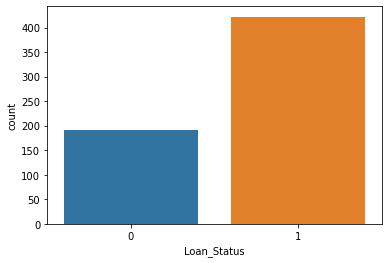

In [59]:
sns.countplot(data=df,x='Loan_Status')
print('\n')
print(df['Loan_Status'].value_counts())
print('\n')

In [60]:
422/(614) 

0.6872964169381107

> **68.72%** Loan Applicant's Loan is **Approved**



1    502
0    112
Name: Sex, dtype: int64


Male:1 
 Female:0 
 % Sex
0    66.964286
1    69.123506
Name: Loan_Status, dtype: float64


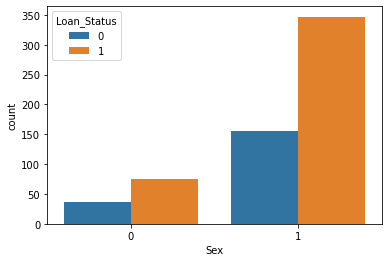

In [61]:
sns.countplot(x='Sex',data=df,hue='Loan_Status')
print('\n')
print(df['Sex'].value_counts())
print('\n')
print("Male:1","\n","Female:0","\n",'%',(df.groupby('Sex')['Loan_Status'].mean())*100)

In [62]:
print('Male applicants',(502/614)*100,'%','\n','Female applicants',(112/614)*100,'%')

Male applicants 81.75895765472313 % 
 Female applicants 18.241042345276874 %


> **81.75%** applicants are **Male**
* out of which **69.12%** Male applicant's Loan is approved

> **18.24%** applicants are **Female**
* out of which **66.96%** female applicants loan is approved

>Male Applicants are more

In [63]:
print((len(df[(df['Sex']==1) & (df['Loan_Status']==1)])/422)*100,'% Male applicants loan is approved')
print('\n')
print((len(df[(df['Sex']==0) & (df['Loan_Status']==1)])/422)*100,'% Female applicants loan is approved')


82.22748815165876 % Male applicants loan is approved


17.77251184834123 % Female applicants loan is approved




1    401
0    213
Name: Marital_Status, dtype: int64



 Yes:1 
 No:0 
 % Marital_Status
0    62.910798
1    71.820449
Name: Loan_Status, dtype: float64


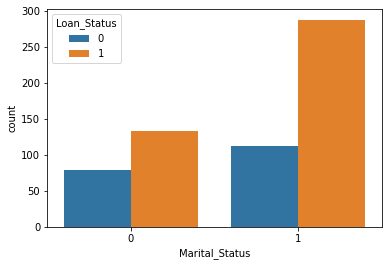

In [64]:

sns.countplot(x='Marital_Status',data=df,hue='Loan_Status')
print('\n')
print(df['Marital_Status'].value_counts())
print('\n')


print('\n','Yes:1','\n','No:0','\n','%',(df.groupby('Marital_Status')['Loan_Status'].mean())*100)

In [65]:
print('Married',(401/614)*100,'%','\n','Not Married',(213/614)*100,'%')

Married 65.30944625407166 % 
 Not Married 34.69055374592834 %


> **65.30%** applicants are **Married**
* out of which **71.82%** Married applicants Loan is approved

> **34.69%** applicants are **Not Married**
* out of which **62.91%** Unmarried applicants loan is approved


In [66]:
print((len(df[(df['Marital_Status']==1) & (df['Loan_Status']==1)])/422)*100,'% Married applicants loan is approved')
print('\n')
print((len(df[(df['Marital_Status']==0) & (df['Loan_Status']==1)])/422)*100,'% Not married applicants loan is approved')


68.24644549763033 % Married applicants loan is approved


31.753554502369667 % Not married applicants loan is approved




1    480
0    134
Name: Education_Status, dtype: int64


 Not Graduate:0 
  Graduate : 1 
 
 % Education_Status
0    61.194030
1    70.833333
Name: Loan_Status, dtype: float64


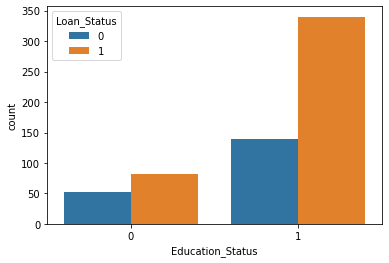

In [67]:
sns.countplot(x='Education_Status',data=df,hue='Loan_Status')
print('\n')
print(df['Education_Status'].value_counts())
print('\n')

print(' Not Graduate:0','\n',' Graduate : 1','\n','\n','%',(df.groupby('Education_Status')['Loan_Status'].mean())*100)

In [68]:
print('Graduates',(480/614)*100,'%','\n','Not Graduate',(134/614)*100,'%')

Graduates 78.17589576547232 % 
 Not Graduate 21.824104234527688 %


> **78.17%** applicants are **Graduate**
* out of which **70.83%** Graduate applicants Loan is approved

> **21.82%** applicants are **Not Graduate**
* out of which **61.19%** Not Graduate applicants loan is approved

>number of graduate loan approved applicant's is more

In [69]:
print((len(df[(df['Education_Status']==1) & (df['Loan_Status']==1)])/422)*100,'% Graduate applicants loan is approved')
print('\n')
print((len(df[(df['Education_Status']==0) & (df['Loan_Status']==1)])/422)*100,'% Not Graduate applicants loan is approved')


80.56872037914692 % Graduate applicants loan is approved


19.431279620853083 % Not Graduate applicants loan is approved




0    532
1     82
Name: Self_Employed, dtype: int64


No:0 
 Yes: 1 
 
 % Self_Employed
0    68.796992
1    68.292683
Name: Loan_Status, dtype: float64


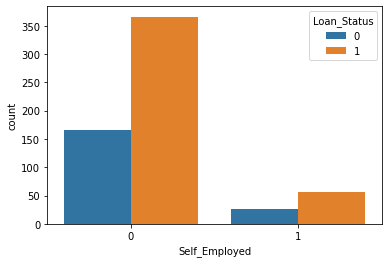

In [70]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
print('\n')
print(df['Self_Employed'].value_counts())
print('\n')

print('No:0','\n','Yes: 1','\n','\n','%',(df.groupby('Self_Employed')['Loan_Status'].mean())*100)



In [71]:
print('Not Self Employed',(532/614)*100,'%','\n','Self Employed',(82/614)*100,'%')

Not Self Employed 86.64495114006515 % 
 Self Employed 13.355048859934854 %


> **86.64%**  applicants are **Not self Employed**
* out of which **68.79%** Not self employed applicant's Loan is approved

> **13.35%** applicants are **Self Employed**
* out of which **68.29%** Self employed applicants loan is approved

>Not Self employed applicants are more

In [72]:
print((len(df[(df['Self_Employed']==0) & (df['Loan_Status']==1)])/422)*100,'% Not Self Employed applicants loan is approved')
print('\n')
print((len(df[(df['Self_Employed']==1) & (df['Loan_Status']==1)])/422)*100,'% Self Employed applicants loan is approved')


86.7298578199052 % Not Self Employed applicants loan is approved


13.270142180094787 % Self Employed applicants loan is approved




0    360
1    102
2    101
4     51
Name: No_Dependents, dtype: int64


% No_Dependents
0    68.611111
1    64.705882
2    75.247525
4    64.705882
Name: Loan_Status, dtype: float64


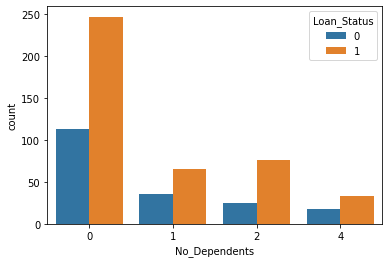

In [73]:
sns.countplot(x='No_Dependents',data=df,hue='Loan_Status')
print('\n')
print(df['No_Dependents'].value_counts())
print('\n')

print('%',(df.groupby('No_Dependents')['Loan_Status'].mean())*100)



In [74]:
print('0',(360/614)*100,'%','\n','1',(102/614)*100,'%','\n','2',(101/614)*100,"%",'\n',"4",(51/614)*100,'%')

0 58.63192182410424 % 
 1 16.612377850162865 % 
 2 16.449511400651463 % 
 4 8.306188925081432 %


> **58.63%** applicants are with **0** dependant
* out of which **68.61%** applicants loan is approved
>**16.61** applicants are with **1** dependant
* out of which **64.70%** applicants loan is approved
>**16.44** applicants are with **2** dependants
* out of which **75.24%** applicants loan is approved
>**8.30%** applicants are with **3+** dependants
* out of which **64.70%** applicants loan is approved
 

In [75]:
print((len(df[(df['No_Dependents']==0) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 0 no of dependents')
print('\n')
print((len(df[(df['No_Dependents']==1) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 1 no of dependents')
print('\n')

print((len(df[(df['No_Dependents']==2) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 2 no of dependents')
print('\n')

print((len(df[(df['No_Dependents']==4) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved with 3+ no of dependents')


58.53080568720379 % applicants loan is approved with 0 no of dependents


15.639810426540285 % applicants loan is approved with 1 no of dependents


18.009478672985782 % applicants loan is approved with 2 no of dependents


7.819905213270142 % applicants loan is approved with 3+ no of dependents




2    233
1    202
0    179
Name: Property_Area, dtype: int64



 Semiurban:2 
 Urban:1 
 Rural:0 
 % Property_Area
0    61.452514
1    65.841584
2    76.824034
Name: Loan_Status, dtype: float64


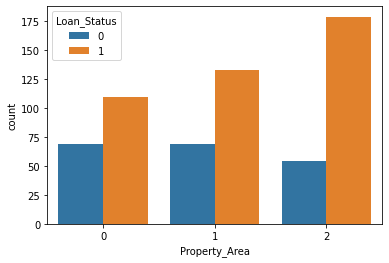

In [76]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
print('\n')
print(df['Property_Area'].value_counts())
print('\n')

print('\n','Semiurban:2','\n','Urban:1','\n','Rural:0','\n','%',(df.groupby('Property_Area')['Loan_Status'].mean())*100)

In [77]:
print('Semiurban',(233/614)*100,'%','\n','Urban',(202/614)*100,'%','\n','Rural',(179/614)*100,'5')

Semiurban 37.94788273615635 % 
 Urban 32.89902280130293 % 
 Rural 29.153094462540718 5


>**37.94%** applicants are from **Semiurban** area
* out of which **76.82%** applicants loan is approved
>**32.89%** applicants are from **Urban** Area
* out of which **65.84%** applicants loan is approved
>**29.15%** applicants are from **Rural** area
* out of which **61.45%** applicants loan is approved

* If applicant is from semiurban area then have 76.82% chances of loan approval  

In [78]:
print((len(df[(df['Property_Area']==2) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved if they are from Semiurban Area')
print('\n')
print((len(df[(df['Property_Area']==1) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved if they are from Urban Area')
print('\n')
print((len(df[(df['Property_Area']==0) & (df['Loan_Status']==1)])/422)*100,'% Not Graduate applicants loan is approved if they are from Rural Area')


42.41706161137441 % applicants loan is approved if they are from Semiurban Area


31.516587677725116 % applicants loan is approved if they are from Urban Area


26.066350710900476 % Not Graduate applicants loan is approved if they are from Rural Area




1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


Credit_History
0.000000     7.865169
0.842199    74.000000
1.000000    79.578947
Name: Loan_Status, dtype: float64


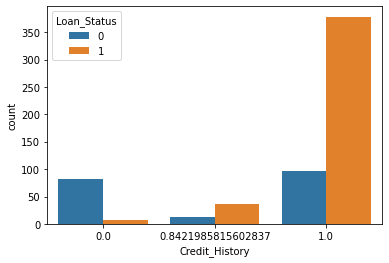

In [79]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')
print('\n')
print(df['Credit_History'].value_counts())
print('\n')

print((df.groupby('Credit_History')['Loan_Status'].mean())*100)

In [80]:
print('Credit history 1  :',(475/614)*100,'%','\n','Credit history 0.842199  :',(50/614)*100,'%','\n','Credit history 0  :',(89/614)*100,'%')

Credit history 1  : 77.36156351791531 % 
 Credit history 0.842199  : 8.143322475570033 % 
 Credit history 0  : 14.495114006514658 %


>**77.36%** applicants are with **1 Credit History**
* out of which **79.57%** applicants loan is approved
>**8.14%** applicants are with **0.842199 Credit History**
* out of which **74%** applicants loan is approved
>**14.49%** applicants are with **0 Credit History**
* out of which only **7.86%** applicants loan is approved
>Applicant with 0 Credit history have approx 92% chances of rejection

In [81]:
print((len(df[(df['Credit_History']==1.000000) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved when credit history is 1')
print('\n')
print((len(df[(df['Credit_History']==0.000000) & (df['Loan_Status']==1)])/422)*100,'% applicants loan is approved when credit history is 0')
print('\n')
print('8.7 % applicants loan is approved when credit history is 0.842199')


89.57345971563981 % applicants loan is approved when credit history is 1


1.6587677725118484 % applicants loan is approved when credit history is 0


8.7 % applicants loan is approved when credit history is 0.842199


In [82]:
df['Tenure'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Tenure, dtype: int64

In [83]:
512/614

0.8338762214983714

* 83.38% applicants have applied loan for duration 360 month

In [84]:
df.columns

Index(['Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Property_Area', 'TOT_INC', 'Loan_Amount',
       'Credit_History', 'Tenure', 'EMI', 'Balance', 'Loan_Status'],
      dtype='object')

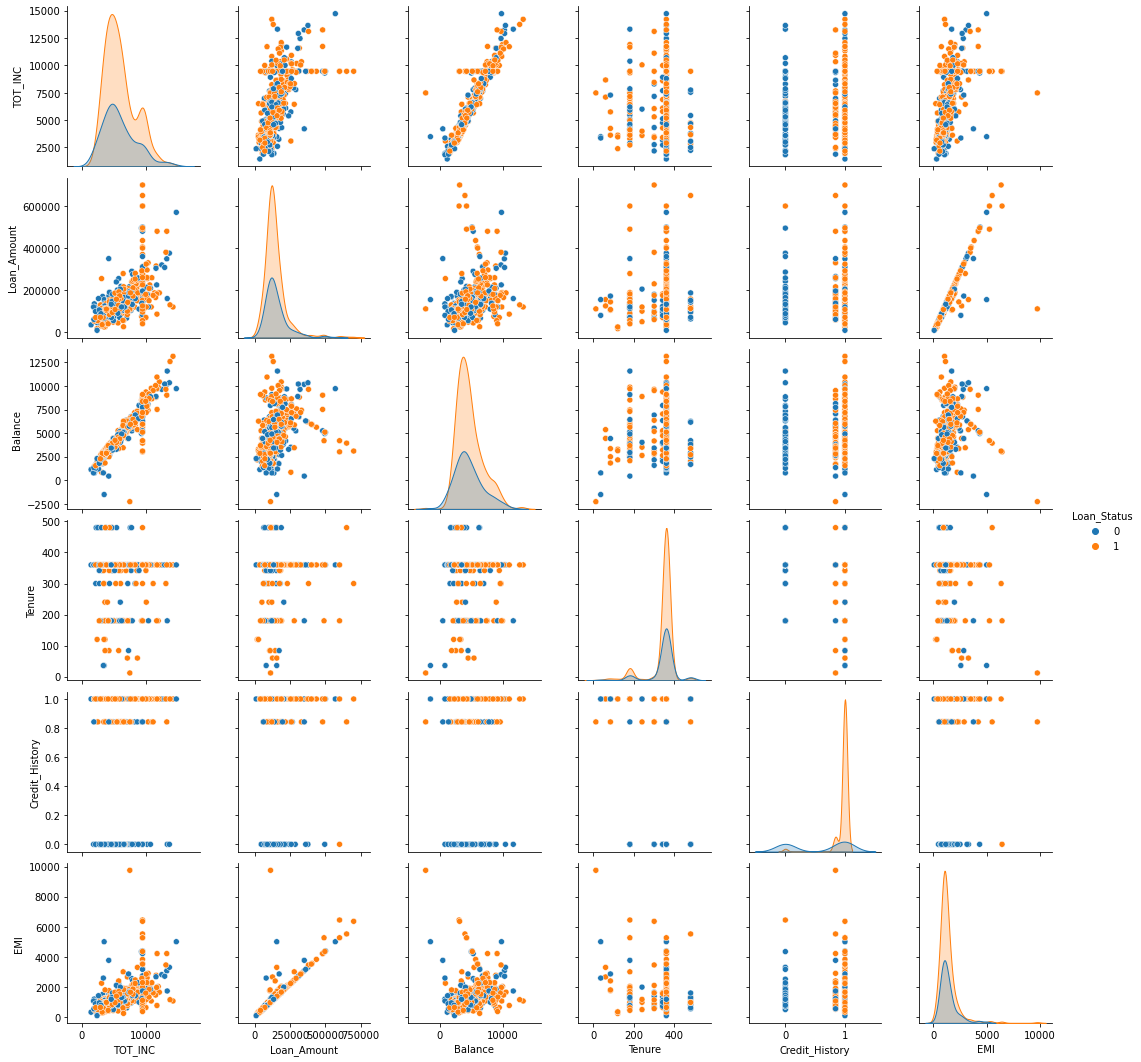

In [85]:
sns.pairplot(df[['TOT_INC', 'Loan_Amount','Balance','Loan_Status','Tenure', 'Credit_History', 'EMI']],hue='Loan_Status')

<AxesSubplot:>

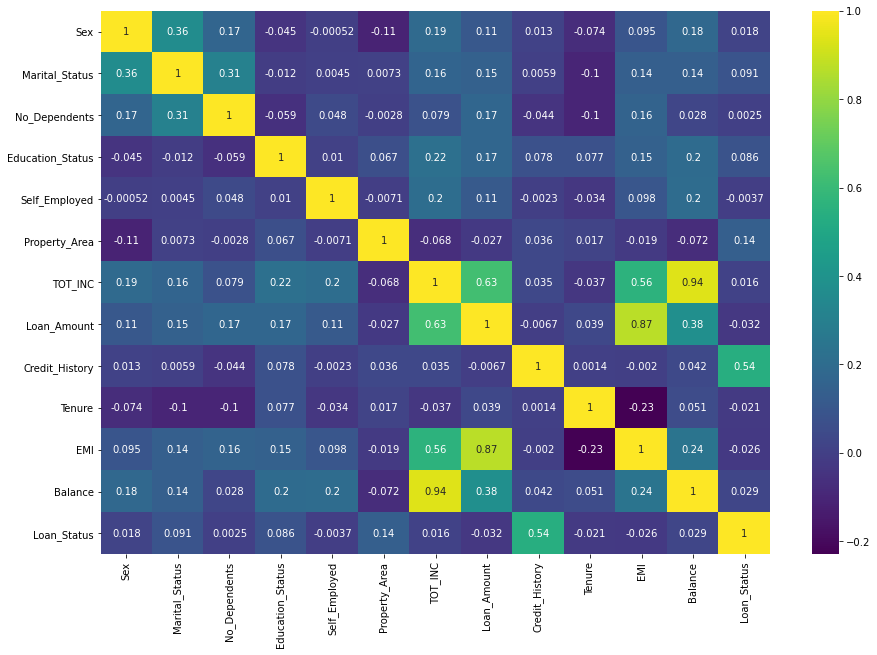

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

* Loan Status and Credit History are highly correlated

In [87]:
df.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance,Loan_Status
0,1,0,0,1,0,1,5849.0,120000.0,1.0,360.0,1053,4795,1
1,1,1,1,1,0,0,6091.0,128000.0,1.0,360.0,1123,4967,0
2,1,1,0,1,1,1,3000.0,66000.0,1.0,360.0,579,2420,1
3,1,1,0,0,0,1,4941.0,120000.0,1.0,360.0,1053,3887,1
4,1,0,0,1,0,1,6000.0,141000.0,1.0,360.0,1237,4762,1


In [88]:
df.isna().sum()

Sex                 0
Marital_Status      0
No_Dependents       0
Education_Status    0
Self_Employed       0
Property_Area       0
TOT_INC             0
Loan_Amount         0
Credit_History      0
Tenure              0
EMI                 0
Balance             0
Loan_Status         0
dtype: int64

<hr>

<a id='Statistic_Model'></a>


# Statistic Model

In [89]:
X_st= df.drop('Loan_Status',axis=1)
Y_st=df['Loan_Status']

In [90]:
import statsmodels.api as sm
model = sm.Logit(Y_st, X_st)
result = model.fit(method='newton')
result.params

Optimization terminated successfully.
         Current function value: 0.466822
         Iterations 6


Sex                -0.207201
Marital_Status      0.521840
No_Dependents      -0.002063
Education_Status    0.278901
Self_Employed      -0.028671
Property_Area       0.389804
TOT_INC            -1.027099
Loan_Amount         0.000003
Credit_History      3.598045
Tenure             -0.004851
EMI                 1.026620
Balance             1.027098
dtype: float64

In [91]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      602
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                  0.2486
Time:                        16:46:36   Log-Likelihood:                -286.63
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 1.046e-34
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Sex                 -0.2072      0.295     -0.702      0.482      -0.785       0.371
Marital_Status       0.5218      0.242      2.157      0.031       0.048       0.996
No_Dependents       -0.0021      0.094     -0.022      0.982      -0.185       0.181
Education_Status     0.2789      0.258      1.079      0.281      -0.228       0.785
Self_Employed       -0.0287      0.313     -0.092      0.927      -0.642       0.585
Property_Area        0.3898      0.129      3.015      0.003       0.136       0.643
TOT_INC             -1.0271      0.621     -1.653      0.098      -2.245       0.191
Loan_Amount       2.567e-06   2.54e-06      1.011      0.312   -2.41e-06    7.54e-06
Credit_History       3.5980      0.364      9.889      0.000       2.885       4.311
Tenure              -0.0049      0.002     -2.738      0.006      -0.008      -0.001
EMI                  1.0266      0.621      1.652      0.098      -0.191       2.244
Balance              1.0271      0.621      1.653      0.098      -0.191       2.245
====================================================================================
"""

In [92]:
y_pred_st=result.predict(X_st)

In [93]:
from sklearn.metrics import average_precision_score, brier_score_loss, \
    log_loss, roc_auc_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, median_absolute_error, r2_score

m_names = [
    'average_precision_score', 'brier_score_loss',
    'log_loss', 'roc_auc_score',
    'explained_variance_score', 'mean_absolute_error',
    'mean_squared_error', 'median_absolute_error', 'r2_score'
]
metrics = [average_precision_score, brier_score_loss, log_loss, roc_auc_score,
           explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score]
for n, m in zip(m_names, metrics):
    print('{:.2f}: {} '.format(m(Y_st, y_pred_st), n))

0.86: average_precision_score 
0.15: brier_score_loss 
0.47: log_loss 
0.78: roc_auc_score 
0.31: explained_variance_score 
0.30: mean_absolute_error 
0.15: mean_squared_error 
0.20: median_absolute_error 
0.31: r2_score 


In [94]:
result.params

Sex                -0.207201
Marital_Status      0.521840
No_Dependents      -0.002063
Education_Status    0.278901
Self_Employed      -0.028671
Property_Area       0.389804
TOT_INC            -1.027099
Loan_Amount         0.000003
Credit_History      3.598045
Tenure             -0.004851
EMI                 1.026620
Balance             1.027098
dtype: float64

In [95]:
model_odds = pd.DataFrame(np.exp(result.params), df.columns[0:-1],columns= ['OR'])
model_odds['P>|z|']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,OR,P>|z|,2.5%,97.5%
Sex,0.812856,4.824229e-01,0.455954,1.449126
Marital_Status,1.685126,3.101129e-02,1.048806,2.707505
No_Dependents,0.997939,9.824035e-01,0.830779,1.198733
Education_Status,1.321676,2.805082e-01,0.796420,2.193351
Self_Employed,0.971736,9.270500e-01,0.526011,1.795154
Property_Area,1.476692,2.568777e-03,1.146156,1.902549
TOT_INC,0.358044,9.827141e-02,0.105957,1.209877
Loan_Amount,1.000003,3.118788e-01,0.999998,1.000008
Credit_History,36.526768,4.651544e-23,17.902098,74.527845
Tenure,0.995161,6.179281e-03,0.991712,0.998622


> Sex has benchmark Male as 1
As compared to females, males are more likely to get loans approved.

> married are more likely to get loan approved as comapred to not married

> Graduates are more likely to get loan approved


In [96]:
# Significant Values
model_odds[model_odds['P>|z|']<=0.05]

,OR,P>|z|,2.5%,97.5%
Marital_Status,1.685126,3.101129e-02,1.048806,2.707505
Property_Area,1.476692,2.568777e-03,1.146156,1.902549
Credit_History,36.526768,4.651544e-23,17.902098,74.527845
Tenure,0.995161,6.179281e-03,0.991712,0.998622


* Credit history is highly correlated

* the odds of loan approval increase by a factor of 36.526768 for every unit increase in Credit History
* the odds of loan approal increase by a factor of 0.99 for every unit increase in Tenure
* the odds of loan approval increae by a factor of 1.68 if applicant is married
* the odds of loan approval increae by a factor of 1.47 if applicant is from semiurban area
* the odds of loan approal increase by a factor of 2.79 for every unit increase in EMI and Balance


<hr>

<a id='Machine_Learning'></a>

# Machine Learning

<hr>

<a id='Train_Test_Split_without_Std_Scalling'></a>

### Train Test Splitting without standard scalling 

In [97]:
x= df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
# Splitting Data into Train Test
# Train 80%
# Test 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y,random_state=101)   


In [100]:
print('X_train shape: ',X_train.shape)
print('\n')
print('y_train shape: ',y_train.shape)
print('\n')
print('X_test shape: ',X_test.shape)
print('\n')

print('y_test shape: ',y_test.shape)

X_train shape:  (491, 12)


y_train shape:  (491,)


X_test shape:  (123, 12)


y_test shape:  (123,)


<a id='Logit_without_scalling'></a>

### Logistic Regression without Scalling

In [101]:
from sklearn.linear_model import LogisticRegression
Logit1= LogisticRegression()
Logit1.fit(X_train,y_train)

y_hat1 = Logit1.predict_proba(X_test )
y_hat1[:, 1]  # probability for only positive outcome

array([0.48018757, 0.52752946, 0.62031925, 0.42721638, 0.88194707,
       0.89349158, 0.5155808 , 0.3683633 , 0.87117816, 0.80551979,
       0.87346899, 0.68328502, 0.83681973, 0.38891461, 0.88790841,
       0.92076238, 0.76756355, 0.65272742, 0.74556619, 0.80649754,
       0.68537646, 0.32614238, 0.89999029, 0.9175094 , 0.60758788,
       0.86130133, 0.75966083, 0.80728984, 0.71829438, 0.51877335,
       0.84719131, 0.83059204, 0.5752683 , 0.84025909, 0.70660952,
       0.81024457, 0.59510458, 0.4216303 , 0.6820545 , 0.89427956,
       0.71725465, 0.72104547, 0.42978972, 0.74018173, 0.35485252,
       0.44652795, 0.61039335, 0.53079188, 0.80211755, 0.31349827,
       0.77697982, 0.77124748, 0.654478  , 0.50398467, 0.43014114,
       0.35541037, 0.73806307, 0.86287548, 0.60472136, 0.84461658,
       0.85194169, 0.84269068, 0.48969161, 0.73375379, 0.82281083,
       0.80566237, 0.40702626, 0.83952306, 0.65760318, 0.50587181,
       0.88790926, 0.69473749, 0.79907727, 0.92771377, 0.64968

In [102]:
Logit1.fit(X_train,y_train)

LogisticRegression()

In [103]:
from sklearn.metrics import accuracy_score
y_pred_Logit1=Logit1.predict(X_test)
Testing_data_Accuracy=accuracy_score(y_test,y_pred_Logit1)
print('Accuracy on Testing data:',Testing_data_Accuracy)

Accuracy on Testing data: 0.7804878048780488


<a id='Logit_using_hyperparameters'></a>

### Logit using hyperparameters

In [104]:
from sklearn.model_selection import GridSearchCV

grid_model1= GridSearchCV(Logit1,param_grid={'C':np.logspace(0,10),'penalty':['l1','l2'],'solver':['lbfgs','saga','newton-cg']},return_train_score=True,
)

In [105]:
grid_model1.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+00,
       6.55128557e+00, 1.04811313e+01, 1.67683294e+01, 2.68269580e+01,
       4.29193426e+01, 6.86648845e+01, 1.09854114e+02, 1.75751062e+02,
       2.81176870e+02, 4.49843267e+02, 7.19685673e+02, 1.15139540e+03,
       1.84206997e+03, 2.94705170e+03, 4.71486636e+0...
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             return_train_score=True)

In [106]:
grid_model1.best_params_

{'C': 6.551285568595509, 'penalty': 'l2', 'solver': 'newton-cg'}

In [107]:
Logit1_grid=LogisticRegression(C=6.55,penalty='l2',solver='newton-cg')

In [108]:
Logit1_grid

LogisticRegression(C=6.55, solver='newton-cg')

In [109]:
Logit1_grid.fit(X_train,y_train)

LogisticRegression(C=6.55, solver='newton-cg')

In [110]:
y_pred_Logit1_grid=Logit1_grid.predict(X_test)
a=accuracy_score(y_test,y_pred_Logit1_grid)
print('Accuracy_Score On Y',a)

Accuracy_Score On Y 0.8211382113821138


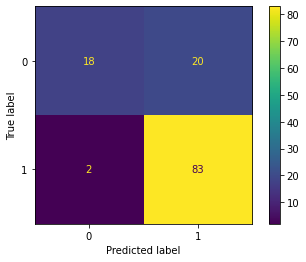

In [111]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_Logit1_grid)
plot_confusion_matrix(Logit1_grid,X_test,y_test)

In [112]:
print(classification_report(y_test,y_pred_Logit1_grid))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



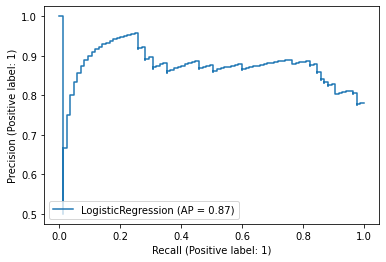

In [113]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(Logit1_grid,X_test,y_test)

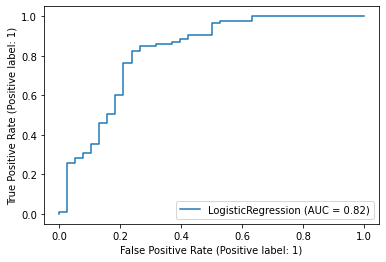

In [114]:
plot_roc_curve(Logit1_grid,X_test,y_test)

In [115]:
#but we use scalling because

---

<a id='Train_Test_Splitting_and_scalling'></a>


## Train Test Splitting and scalling

In [116]:
x= df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)

In [118]:
# Splitting Data into Train Test
# Train 80%
# Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=101)   


In [119]:
print('X_train shape: ',X_train.shape)
print('\n')
print('y_train shape: ',y_train.shape)
print('\n')
print('X_test shape: ',X_test.shape)
print('\n')

print('y_test shape: ',y_test.shape)


X_train shape:  (491, 12)


y_train shape:  (491,)


X_test shape:  (123, 12)


y_test shape:  (123,)


<hr>

<a id='Logistic_Regression'></a>


### Logistic Regression 


<a id='Without_Hyperparameters'></a>

#### without Hyperparameters

In [120]:
from sklearn.linear_model import LogisticRegression
Logit2= LogisticRegression()
Logit2.fit(X_train,y_train)

y_hat1 = Logit2.predict_proba(X_test )
y_hat1[:, 1]  # probability for only positive outcome

array([0.65955475, 0.73784552, 0.72264596, 0.63604289, 0.8433223 ,
       0.85457922, 0.08792447, 0.06352161, 0.84745896, 0.81800004,
       0.83820644, 0.75104783, 0.79995434, 0.06776598, 0.82614069,
       0.89916173, 0.82579108, 0.7378684 , 0.84650022, 0.86949031,
       0.71803509, 0.05223157, 0.90889305, 0.91075756, 0.74927136,
       0.85710886, 0.74094295, 0.80728359, 0.77413   , 0.70949656,
       0.87778896, 0.82459361, 0.75396045, 0.87543094, 0.81636896,
       0.81834543, 0.78032185, 0.07813788, 0.8072283 , 0.86814758,
       0.81957343, 0.82119192, 0.59536776, 0.1426944 , 0.05502943,
       0.62699542, 0.76652301, 0.64488382, 0.14756948, 0.06174984,
       0.79666301, 0.81127215, 0.82482664, 0.5327212 , 0.59613989,
       0.66230368, 0.78254035, 0.88344527, 0.61700346, 0.87695549,
       0.82498479, 0.87681128, 0.64986398, 0.81253559, 0.86733735,
       0.81899484, 0.07950174, 0.87512804, 0.75314304, 0.6836436 ,
       0.82961175, 0.81183838, 0.82584133, 0.90002119, 0.74713

In [121]:
Logit2.fit(X_train,y_train)

LogisticRegression()

In [122]:
from sklearn.metrics import accuracy_score
y_pred_Logit2=Logit2.predict(X_test)
Testing_data_Accuracy=accuracy_score(y_test,y_pred_Logit2)
print('Accuracy on Testing data:',Testing_data_Accuracy)

Accuracy on Testing data: 0.8211382113821138


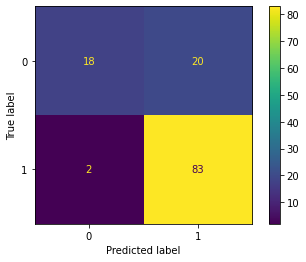

In [123]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_Logit2)
plot_confusion_matrix(Logit2,X_test,y_test)

In [124]:
print(classification_report(y_test,y_pred_Logit2))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



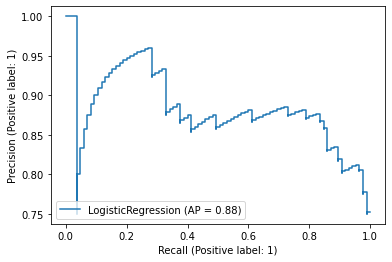

In [125]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(Logit2,X_test,y_test)

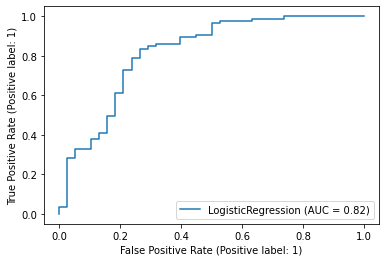

In [126]:
plot_roc_curve(Logit2,X_test,y_test)

<hr>

<a id='Using_Hyperparameters'></a>

## Logistic regression using hyperparameters

In [127]:
from sklearn.model_selection import GridSearchCV

grid_model2= GridSearchCV(Logit2,param_grid={'C':np.logspace(0,10),'penalty':['l1','l2'],'solver':['lbfgs','saga','newton-cg']},return_train_score=True,
)

In [128]:
grid_model2.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+00,
       6.55128557e+00, 1.04811313e+01, 1.67683294e+01, 2.68269580e+01,
       4.29193426e+01, 6.86648845e+01, 1.09854114e+02, 1.75751062e+02,
       2.81176870e+02, 4.49843267e+02, 7.19685673e+02, 1.15139540e+03,
       1.84206997e+03, 2.94705170e+03, 4.71486636e+0...
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             return_train_score=True)

In [129]:
grid_model2.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

In [130]:
Logit_final=LogisticRegression(C=1,penalty='l1',solver='saga')

In [131]:
Logit_final

LogisticRegression(C=1, penalty='l1', solver='saga')

In [132]:
Logit_final.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [133]:
y_pred_Logit_final=Logit_final.predict(X_test)
a=accuracy_score(y_test,y_pred_Logit_final)
print('Accuracy_Score On Y',a)

Accuracy_Score On Y 0.8211382113821138


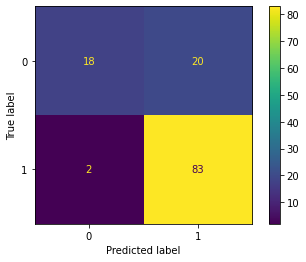

In [134]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_Logit_final)
plot_confusion_matrix(Logit_final,X_test,y_test)

In [135]:
print(classification_report(y_test,y_pred_Logit_final))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



In [136]:
Logit_final.coef_

array([[ 0.        ,  0.22570722,  0.01952901,  0.07067077,  0.03682737,
         0.34053296,  0.        , -0.07411284,  1.33734824, -0.05474209,
        -0.00404227,  0.02662252]])

In [137]:
Logit_final.intercept_

array([0.78895721])

In [138]:
Logit_final.coef_[0]

array([ 0.        ,  0.22570722,  0.01952901,  0.07067077,  0.03682737,
        0.34053296,  0.        , -0.07411284,  1.33734824, -0.05474209,
       -0.00404227,  0.02662252])

In [139]:
coefs = pd.Series(index=x.columns,data=Logit_final.coef_[0])
coefs

Sex                 0.000000
Marital_Status      0.225707
No_Dependents       0.019529
Education_Status    0.070671
Self_Employed       0.036827
Property_Area       0.340533
TOT_INC             0.000000
Loan_Amount        -0.074113
Credit_History      1.337348
Tenure             -0.054742
EMI                -0.004042
Balance             0.026623
dtype: float64

In [140]:
cfs = coefs.sort_values( ascending=False)

In [141]:
cfs

Credit_History      1.337348
Property_Area       0.340533
Marital_Status      0.225707
Education_Status    0.070671
Self_Employed       0.036827
Balance             0.026623
No_Dependents       0.019529
Sex                 0.000000
TOT_INC             0.000000
EMI                -0.004042
Tenure             -0.054742
Loan_Amount        -0.074113
dtype: float64

* Credit History > Property Area > Marital Status

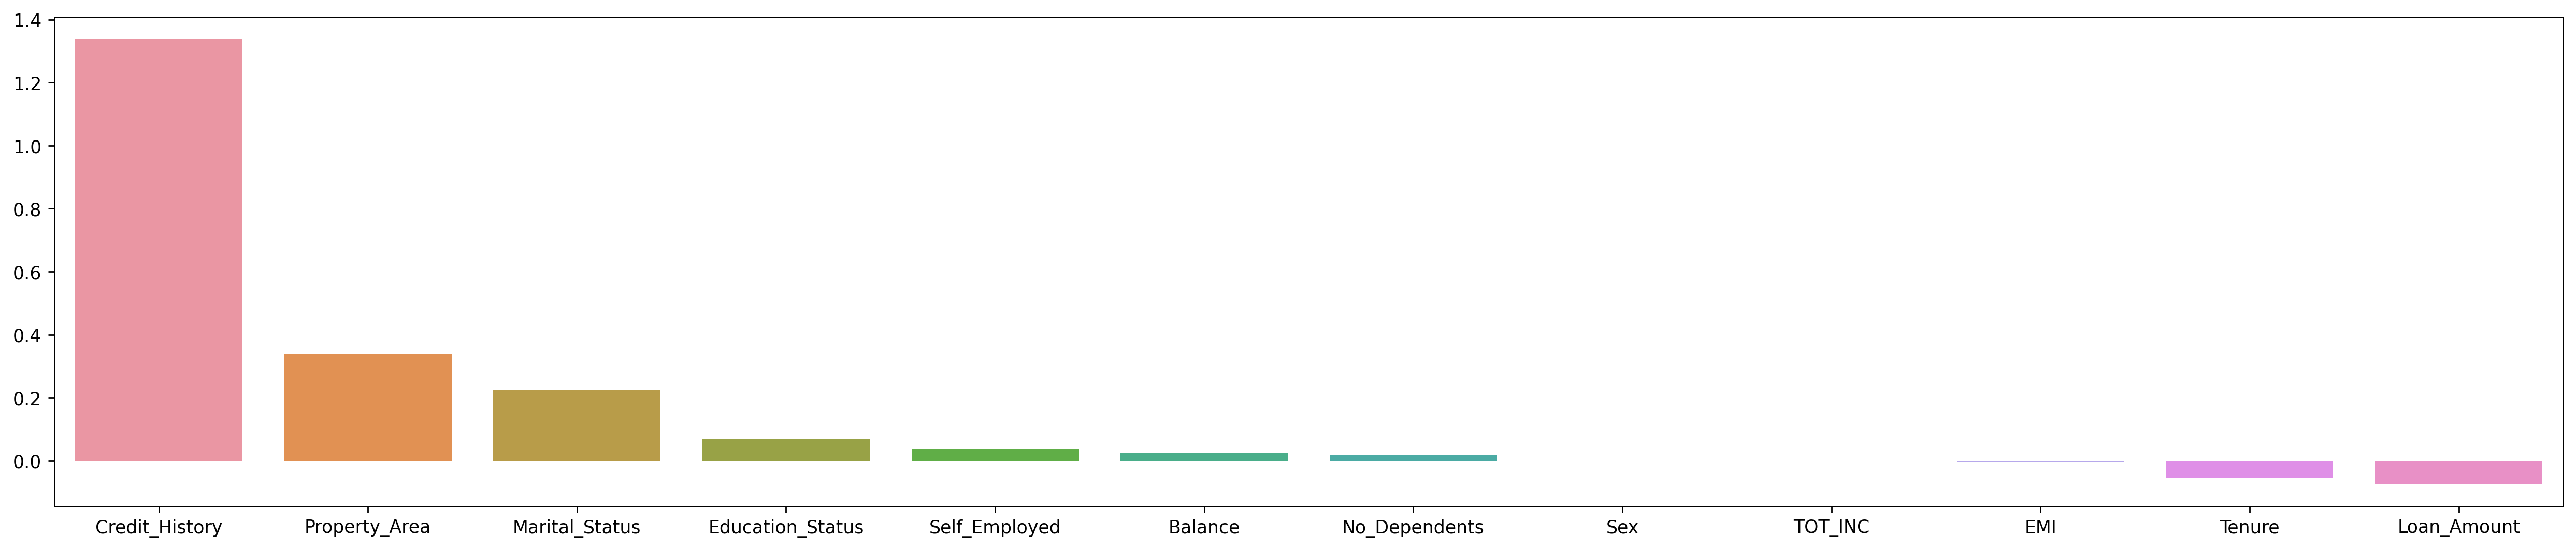

In [142]:
plt.figure(figsize=(25,5),dpi=250)
sns.barplot(x=cfs.index,y=cfs.values);

#### Performance Curve

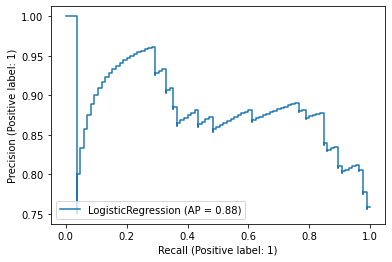

In [143]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(Logit_final,X_test,y_test)

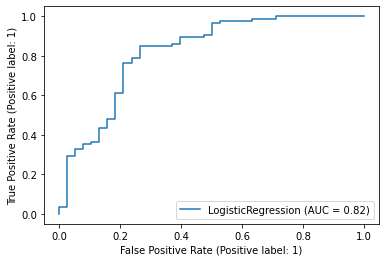

In [144]:
plot_roc_curve(Logit_final,X_test,y_test)

* Area Under the curve is 82%

<hr>

<a id='Decision_Tree_Classifier'></a>

## Decision Tree Classifier

<hr>

<a id='without_hyperparameters'></a>

### without hyperparameters

In [145]:
from sklearn.tree import DecisionTreeClassifier
model_D = DecisionTreeClassifier()
model_D.fit(X_train,y_train)

DecisionTreeClassifier()

In [146]:
y_pred_D= model_D.predict(X_test)

In [147]:
y_pred_D

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

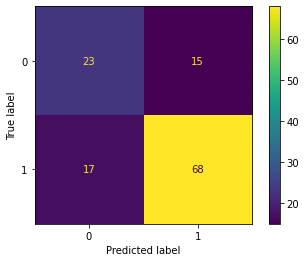

In [148]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred_D)
plot_confusion_matrix(model_D,X_test,y_test)

In [149]:

print(classification_report(y_test,y_pred_D))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        38
           1       0.82      0.80      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.74      0.74      0.74       123



In [150]:
model_D.feature_importances_

array([0.00473043, 0.00609266, 0.05754961, 0.01261449, 0.02910643,
       0.04307906, 0.14388051, 0.14321931, 0.29061634, 0.03203727,
       0.08042185, 0.15665205])

In [151]:
pd.DataFrame(index=x.columns,data=model_D.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Sex,0.004730
Marital_Status,0.006093
No_Dependents,0.057550
Education_Status,0.012614
Self_Employed,0.029106
Property_Area,0.043079
TOT_INC,0.143881
Loan_Amount,0.143219
Credit_History,0.290616
Tenure,0.032037


* Credit history is more important
* Credit history>Total Income>Balance>Loan amount

### Visualization of tree

In [152]:
from sklearn.tree import plot_tree

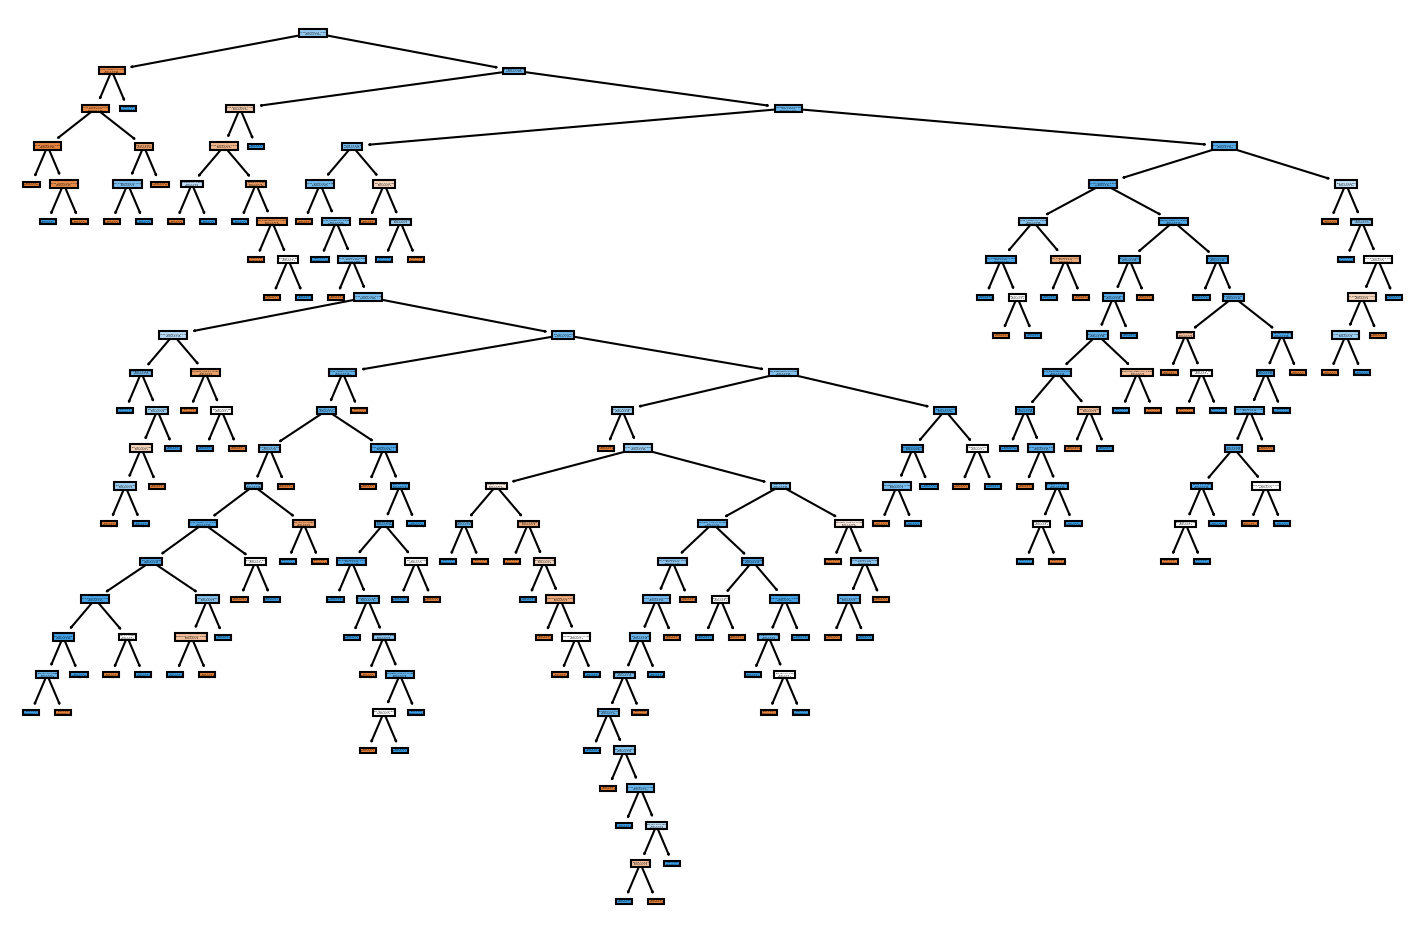

In [153]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model_D,filled=True,feature_names=x.columns);

In [154]:
def report_model(model_D):
    model_preds = model_D.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model_D,filled=True,feature_names=x.columns);

In [155]:
# max_depth
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        38
           1       0.81      0.95      0.88        85

    accuracy                           0.81       123
   macro avg       0.82      0.73      0.75       123
weighted avg       0.81      0.81      0.80       123





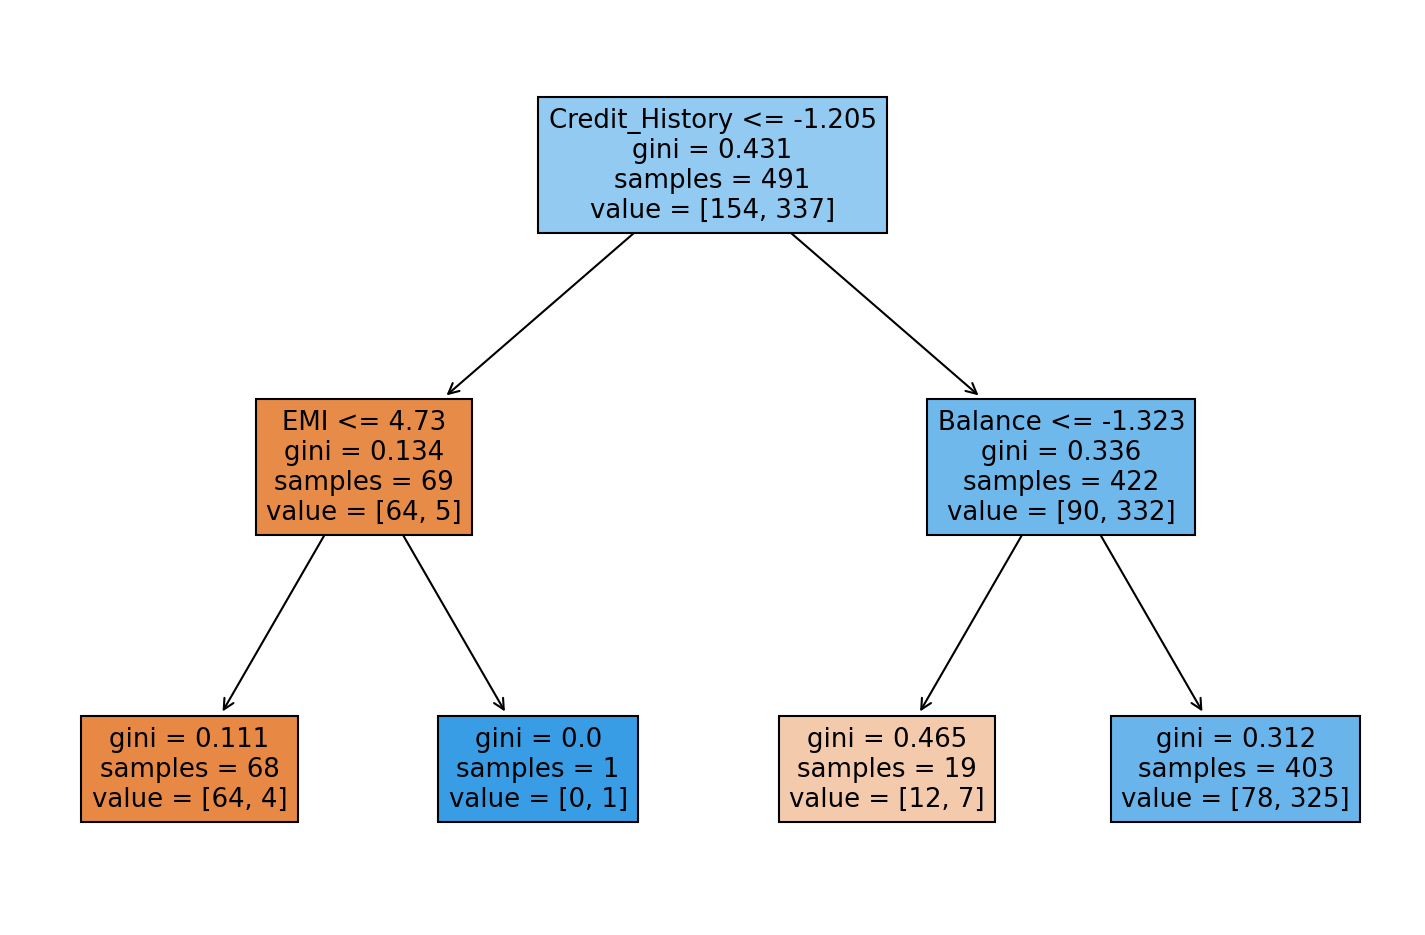

In [156]:
report_model(pruned_tree)

In [157]:
#max Leaf nodes
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        38
           1       0.81      0.95      0.88        85

    accuracy                           0.81       123
   macro avg       0.82      0.73      0.75       123
weighted avg       0.81      0.81      0.80       123





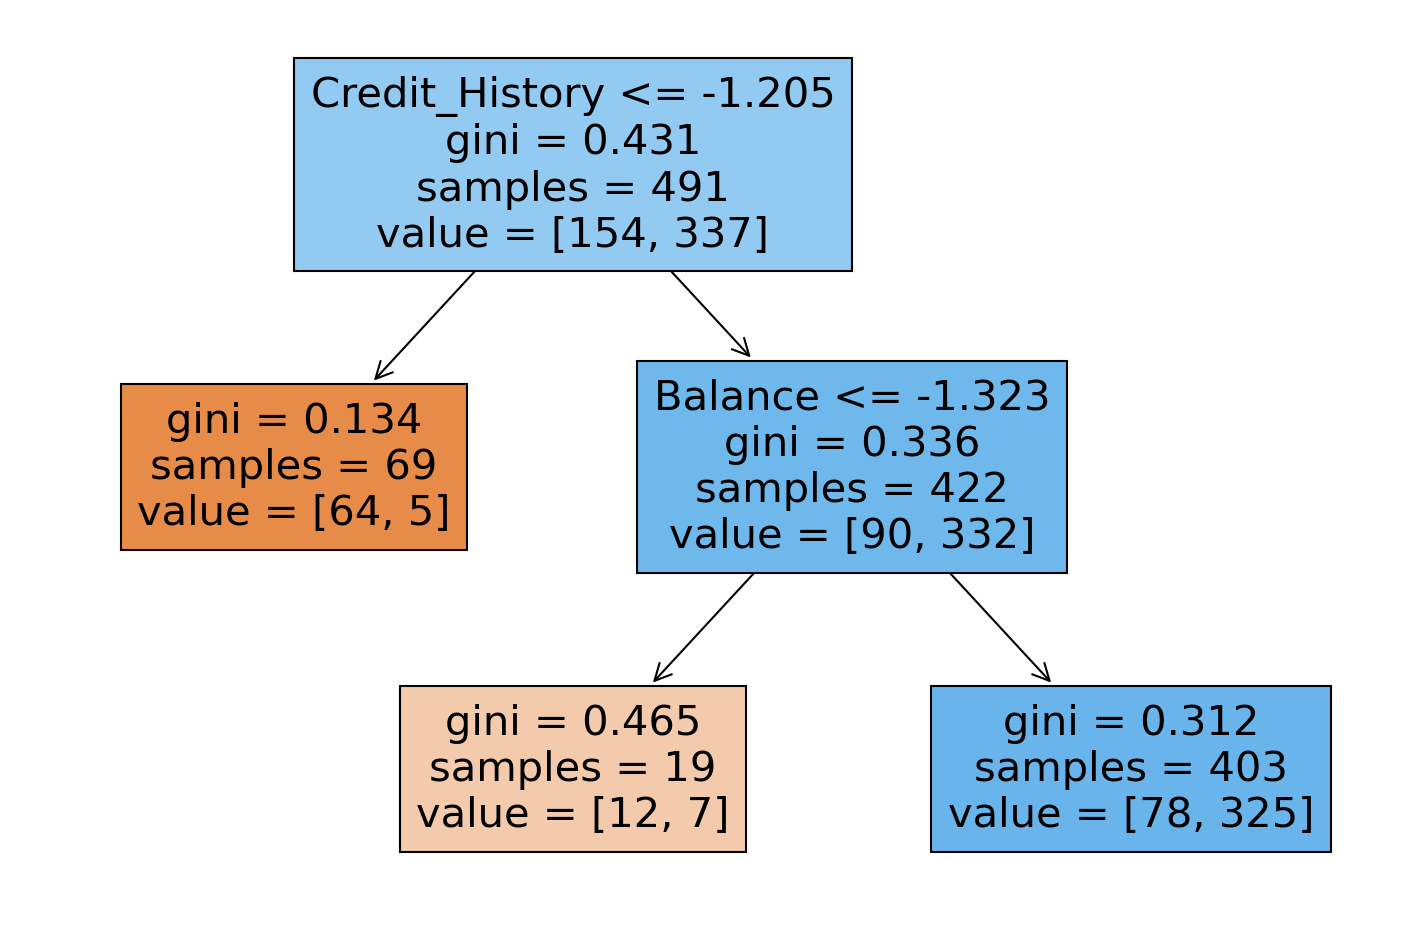

In [158]:
report_model(pruned_tree)

In [159]:
#Criterion
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.47      0.58      0.52        38
           1       0.79      0.71      0.75        85

    accuracy                           0.67       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.69      0.67      0.67       123





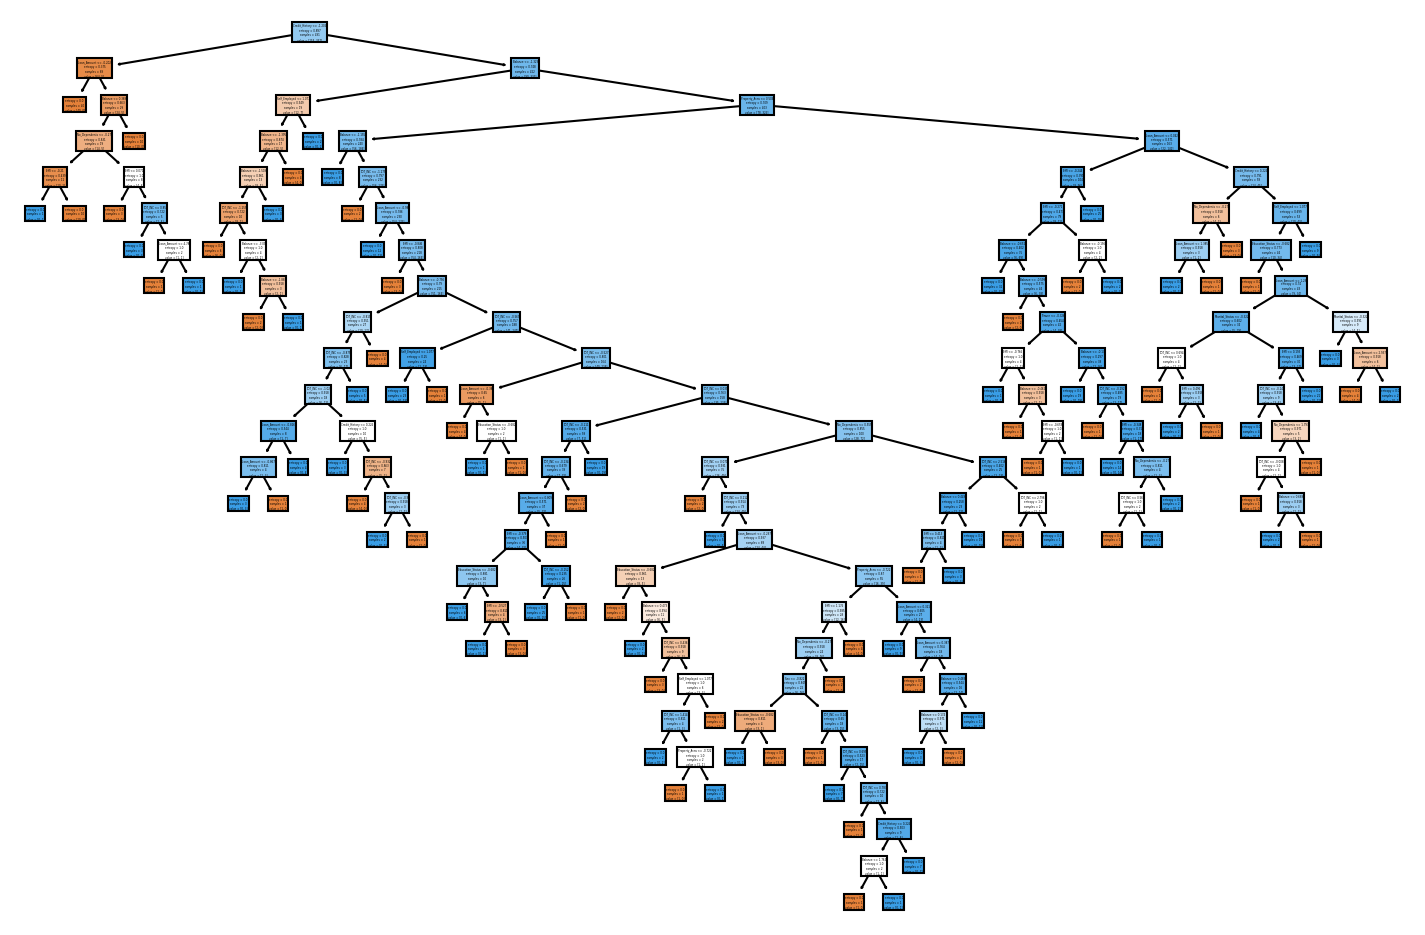

In [160]:
report_model(entropy_tree)

<a id='using_hyperparameters'></a>

### using HyperParameters

In [161]:

grid_model_D= GridSearchCV(model_D,param_grid={'criterion':['gini','entropy'],'max_depth':(2,3),'max_leaf_nodes':(2,3)},return_train_score=True)

In [162]:
grid_model_D.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': (2, 3),
                         'max_leaf_nodes': (2, 3)},
             return_train_score=True)

In [163]:
grid_model_D.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3}

In [164]:
final_model_D=DecisionTreeClassifier(criterion='gini', max_depth= 2,max_leaf_nodes= 2)

In [165]:
final_model_D.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

In [166]:
y_pred_D1 =final_model_D.predict(X_test)

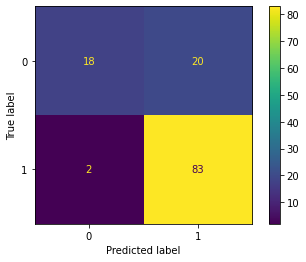

In [167]:
confusion_matrix(y_test,y_pred_D1)
plot_confusion_matrix(final_model_D,X_test,y_test)

In [168]:

print(classification_report(y_test,y_pred_D1))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



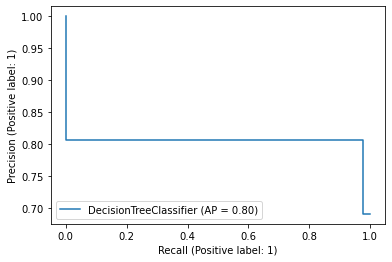

In [169]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(final_model_D,X_test,y_test)

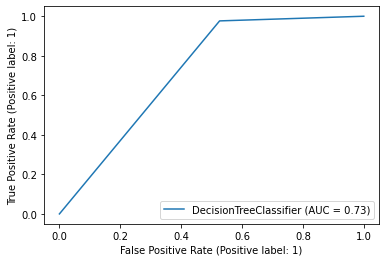

In [170]:
plot_roc_curve(final_model_D,X_test,y_test)

In [171]:
final_model_D.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [172]:
pd.DataFrame(index=x.columns,data=final_model_D.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Sex,0.0
Marital_Status,0.0
No_Dependents,0.0
Education_Status,0.0
Self_Employed,0.0
Property_Area,0.0
TOT_INC,0.0
Loan_Amount,0.0
Credit_History,1.0
Tenure,0.0


* Credit history have all importance and other features are not important

<hr>

<a id='Random_Forest_Classifier'></a>

# Random Forest Classifier

<hr>

<a id='without_Hyperparameters'></a>

### without hyperparameters

In [173]:
from sklearn.ensemble import RandomForestClassifier
model_R = RandomForestClassifier()
model_R.fit(X_train,y_train)

RandomForestClassifier()

In [174]:
y_pred_R = model_R.predict(X_test)

In [175]:
accuracy_score(y_test,y_pred_R)

0.8292682926829268

In [176]:

confusion_matrix(y_test,y_pred_R)

array([[21, 17],
       [ 4, 81]], dtype=int64)

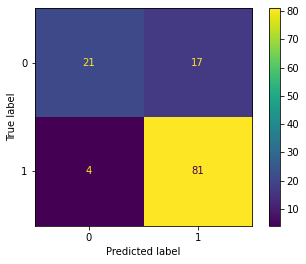

In [177]:
plot_confusion_matrix(model_R,X_test,y_test)

# Random Forest Classifier

<a id='using_Hyperparameters'></a>

### using Hyperparameters

In [178]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model_rndm = RandomForestClassifier(n_estimators=n,max_features='auto')
    model_rndm.fit(X_train,y_train)
    test_preds = model_rndm.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

In [179]:
len(test_error)

39

In [180]:
test_error

[0.2764227642276422,
 0.34959349593495936,
 0.2195121951219512,
 0.3089430894308943,
 0.2520325203252033,
 0.26016260162601623,
 0.24390243902439024,
 0.22764227642276424,
 0.21138211382113825,
 0.2032520325203252,
 0.1869918699186992,
 0.21138211382113825,
 0.19512195121951215,
 0.2195121951219512,
 0.1707317073170732,
 0.2032520325203252,
 0.17886178861788615,
 0.1869918699186992,
 0.17886178861788615,
 0.17886178861788615,
 0.14634146341463417,
 0.1869918699186992,
 0.1869918699186992,
 0.1869918699186992,
 0.1707317073170732,
 0.1869918699186992,
 0.16260162601626016,
 0.1707317073170732,
 0.17886178861788615,
 0.19512195121951215,
 0.1707317073170732,
 0.1869918699186992,
 0.1869918699186992,
 0.1707317073170732,
 0.17886178861788615,
 0.19512195121951215,
 0.17886178861788615,
 0.19512195121951215,
 0.16260162601626016]

In [181]:
min(test_error)

0.14634146341463417

In [182]:
temp=min(test_error)
index = test_error.index(temp)
index

20

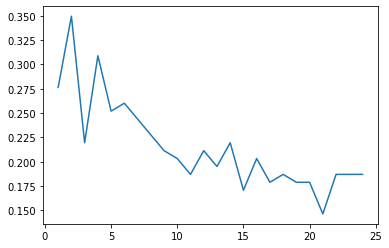

In [183]:
#plt.plot(range(1,100),errors)
plt.plot(range(1,25),test_error[0:24])

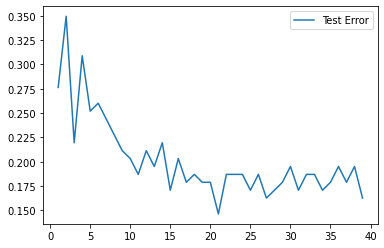

In [184]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [185]:
grid_model_R= GridSearchCV(model_R,param_grid={'n_estimators':[10,16],'criterion':['gini','entropy'],'max_features':[2,3,4],'bootstrap':[True,False],'oob_score':[True,False]},return_train_score=True)

In [186]:
grid_model_R.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4], 'n_estimators': [10, 16],
                         'oob_score': [True, False]},
             return_train_score=True)

In [187]:
grid_model_R.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 2,
 'n_estimators': 16,
 'oob_score': True}

In [188]:
final_model_R= RandomForestClassifier(bootstrap= True,criterion='gini',max_features=2,n_estimators=16,oob_score= True)
final_model_R.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=16, oob_score=True)

In [189]:
y_pred_R1 = final_model_R.predict(X_test)

In [190]:
accuracy_score(y_test,y_pred_R1)

0.8130081300813008

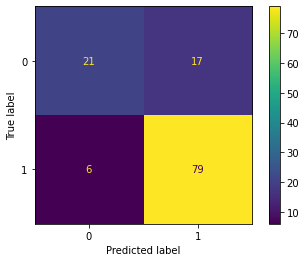

In [191]:
plot_confusion_matrix(final_model_R,X_test,y_test)

In [192]:
print(classification_report(y_test,y_pred_R1))

              precision    recall  f1-score   support

           0       0.78      0.55      0.65        38
           1       0.82      0.93      0.87        85

    accuracy                           0.81       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.81      0.81      0.80       123



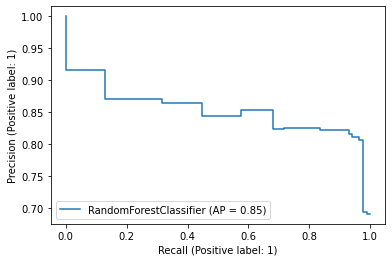

In [193]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(final_model_R,X_test,y_test)

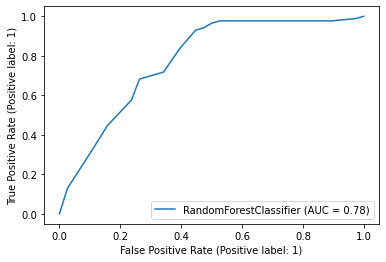

In [194]:
plot_roc_curve(final_model_R,X_test,y_test)

In [195]:
final_model_R.feature_importances_

array([0.01650917, 0.01837623, 0.04960448, 0.01689272, 0.01571471,
       0.03640029, 0.13672388, 0.15343812, 0.2464894 , 0.03843835,
       0.12647999, 0.14493265])

In [196]:
coefs=pd.DataFrame(index=x.columns,data=final_model_R.feature_importances_,columns=['Feature Importance']).sort_values(by='Feature Importance',ascending=False)
coefs

,Feature Importance
Credit_History,0.246489
Loan_Amount,0.153438
Balance,0.144933
TOT_INC,0.136724
EMI,0.126480
No_Dependents,0.049604
Tenure,0.038438
Property_Area,0.036400
Marital_Status,0.018376
Education_Status,0.016893


* Credit history>total income>EMI>Balance>Loan Amount

<a id='KNN_Classifier'></a>

# KNN Classifier

<a id='Without_hyperparameters'></a>

### Without hyperparameters

In [197]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [198]:
y_pred_knn = knn_model.predict(X_test)
a=accuracy_score(y_test,y_pred_knn)
print('accuracy_on_y is ',a*100,'%')

accuracy_on_y is  79.67479674796748 %


In [199]:
error=1-a
error

0.2032520325203252

In [200]:
confusion_matrix(y_test,y_pred_knn)

array([[17, 21],
       [ 4, 81]], dtype=int64)

In [201]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.79      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123



* Accuracy score is verry less 

# KNN Classifier

<a id='Using_hyperparameters'></a>

### Using Hyperaparameters

In [202]:
test_error_rates = []


for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    

In [203]:
len(test_error_rates)

49

In [204]:
test_error_rates

[0.2682926829268293,
 0.2520325203252033,
 0.2032520325203252,
 0.21138211382113825,
 0.2032520325203252,
 0.19512195121951215,
 0.2195121951219512,
 0.22764227642276424,
 0.21138211382113825,
 0.2032520325203252,
 0.19512195121951215,
 0.17886178861788615,
 0.19512195121951215,
 0.17886178861788615,
 0.19512195121951215,
 0.19512195121951215,
 0.19512195121951215,
 0.1869918699186992,
 0.19512195121951215,
 0.19512195121951215,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.21138211382113825,
 0.21138211382113825,
 0.21138211382113825,
 0.21138211382113825,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2032520325203252,
 0.2195121951219512,
 0.2195121951219512,
 0.2195121951219512,
 0.2195121951219512,
 0.2195121951219512,
 0.21138211382113825,
 0.2195121951219512,
 0.21138211382113825,
 0.219512195121

In [205]:
min(test_error_rates)

0.17886178861788615

In [206]:
temp=min(test_error_rates)
index = test_error_rates.index(temp)
index

11

Text(0.5, 0, 'K Value')

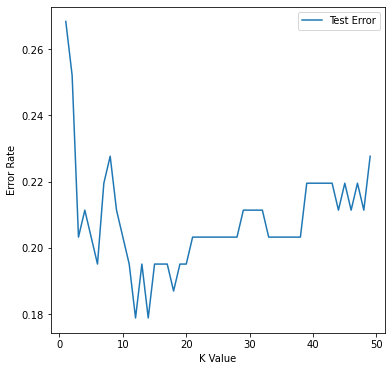

In [207]:


plt.figure(figsize=(6,6))
plt.plot(range(1,50),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")


*best k value will be 11

In [208]:
final_model_knn = KNeighborsClassifier(n_neighbors=11)
final_model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [209]:
y_pred_knn1 =final_model_knn.predict(X_test)
a=accuracy_score(y_test,y_pred_knn1)
print('accuracy_on_y is ',a*100,'%')

accuracy_on_y is  80.48780487804879 %


In [210]:
confusion_matrix(y_test,y_pred_knn1)

array([[16, 22],
       [ 2, 83]], dtype=int64)

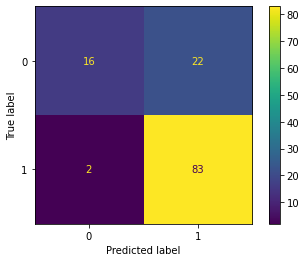

In [211]:
plot_confusion_matrix(final_model_knn,X_test,y_test)

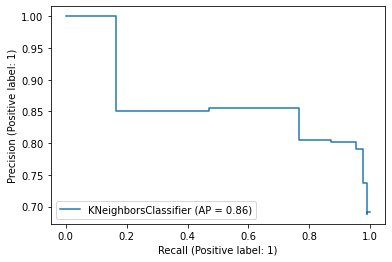

In [212]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(final_model_knn,X_test,y_test)

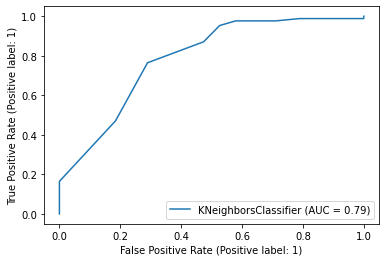

In [213]:
plot_roc_curve(final_model_knn,X_test,y_test)

In [214]:
from sklearn import metrics
Y_proba=final_model_knn.predict_proba(X_test)[::,1]
AUC=metrics.roc_auc_score(y_test,Y_proba)
AUC

0.7869969040247679

* Area under curve is 78%

<a id='Finding_Best_Classifier'></a>

# Finding Best Classifier

In [215]:


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [216]:
import numpy as np
C=np.logspace(0,10)
Cs=np.logspace(0,10)

In [217]:
#Create Parameters
model_parameters={
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion':['gini','entropy'],'max_depth':(2,3),'max_leaf_nodes':(2,3)
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param': {
            'n_neighbors': [3,7,11,15]
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param': {
            'n_estimators':[5,15,30],'criterion':['gini','entropy'],'max_features':[2,3,4],'bootstrap':[True,False],'oob_score':[True,False]
        }
    },
    'LogisticRegression':{
        'model':LogisticRegression(),
        'param':{
            'C':C,'penalty':['l1','l2'],'solver':['lbfgs','saga','newton-cg']
        }
    }
}

In [218]:
scores=[]
for model_name, np in model_parameters.items():
    model_selection = GridSearchCV(estimator=np['model'],param_grid=np['param'],return_train_score=False)
    model_selection.fit(X_train,y_train)
    y_pred_=model_selection.predict(X_test)
    y_pred_proba=model_selection.predict_proba(X_test)[::,1]
    scores.append({
        'model':model_name,
        'best_score_on_Trainning':model_selection.best_score_,
        'best_params_for_model':model_selection.best_params_,
        'accuracy_score_on_Test':accuracy_score(y_test,y_pred_),
        'AUC':metrics.roc_auc_score(y_test,y_pred_proba)
    })
    

In [219]:
model_score=pd.DataFrame(scores,columns=['model','best_score_on_Trainning','best_params_for_model','accuracy_score_on_Test','AUC'])
model_score

,model,best_score_on_Trainning,best_params_for_model,accuracy_score_on_Test,AUC
0,DecisionTreeClassifier,0.812616,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.813008,0.731734
1,KNeighborsClassifier,0.800392,{'n_neighbors': 11},0.804878,0.786997
2,RandomForestClassifier,0.792249,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.813008,0.776780
3,LogisticRegression,0.806514,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.821138,0.819195


In [220]:
with pd.option_context('display.max_colwidth', None):
    display(model_score)

,model,best_score_on_Trainning,best_params_for_model,accuracy_score_on_Test,AUC
0,DecisionTreeClassifier,0.812616,"{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3}",0.813008,0.731734
1,KNeighborsClassifier,0.800392,{'n_neighbors': 11},0.804878,0.786997
2,RandomForestClassifier,0.792249,"{'bootstrap': True, 'criterion': 'entropy', 'max_features': 2, 'n_estimators': 15, 'oob_score': False}",0.813008,0.776780
3,LogisticRegression,0.806514,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.821138,0.819195


>Area under the curve for logistic regression model is 0.82  
* compared to other models it is Logistic regression model's AUC is good
* also with consideration of Accuracy and AUC score 
## Logistic Regression model is best model for this data

<a id='Final_Model'></a>

# Final Logistic Model

In [221]:
final_model=LogisticRegression(C=1,penalty='l1',solver='saga')

In [222]:
final_model.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [223]:
final_model.score(X_test,y_test)

0.8211382113821138

<a id='Accuracy'></a>
 #### * Accuracy

In [224]:
y_pred=final_model.predict(X_test)
a=accuracy_score(y_test,y_pred)
print('Accuracy_Score On Test',int(a*100),'%')

Accuracy_Score On Test 82 %


In [225]:
y_pred_train=final_model.predict(X_train)
b=accuracy_score(y_train,y_pred_train)
print('Accuracy Score On train',int(b*100),'%')

Accuracy Score On train 80 %


In [226]:
from sklearn import metrics

In [227]:
metrics.mean_absolute_error(y_test, y_pred)

0.17886178861788618

In [228]:
metrics.mean_squared_error(y_test, y_pred)

0.17886178861788618

In [229]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.42292054645983584

<a id='Coefficients'></a>
#### * Coefficients

In [230]:
final_model.coef_

array([[ 0.        ,  0.2257104 ,  0.01952352,  0.07066967,  0.0368245 ,
         0.34053167,  0.        , -0.07405082,  1.33734947, -0.05476703,
        -0.00410235,  0.02660695]])

In [231]:
coefs = pd.Series(index=x.columns,data=final_model.coef_[0])
coefs.sort_values(ascending=False)

Credit_History      1.337349
Property_Area       0.340532
Marital_Status      0.225710
Education_Status    0.070670
Self_Employed       0.036825
Balance             0.026607
No_Dependents       0.019524
Sex                 0.000000
TOT_INC             0.000000
EMI                -0.004102
Tenure             -0.054767
Loan_Amount        -0.074051
dtype: float64

* As value of credit history increases the chances of getting loan approved is also increases
* If the loan applicant is married then chances of loan approval will increase

In [232]:
confusion_matrix(y_test,y_pred)

array([[18, 20],
       [ 2, 83]], dtype=int64)

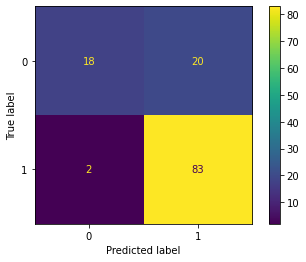

In [233]:

plot_confusion_matrix(final_model,X_test,y_test)


##### True Negative(Actual 0 predicted 0)
> actually 18 applicants loan is  not sanctioned we predicted not senctioned 
* this is good
#####  False Negative (Actual 0 predicted 1)
> actually 20 applicants loan is  not sanctioned we predicted sanctioned 
* this should be our concern 
beacuase as bank will not want to give loan to applicants who don't deserve 

##### False Positive (Actual 1 predicted 0)
> actually 2 applicants loan is sanctioned we predicted not sanctioned  
* this is applicant's loss
##### True Positive (Actual 1 predicted 1)
> actually 83 applicants loan is sanctioned and we predicted sanctined
* Good
  

<hr>


#### Classification Report

In [234]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



In [235]:
to_view=pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
to_view

,Real Values,Predicted Values
341,0,1
349,1,1
152,0,1
268,0,1
257,0,1
...,...,...
480,1,1
94,1,1
358,0,0
607,1,1


#### Precision_Recall and AUC_ROC Curve

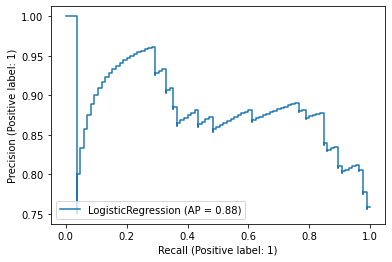

In [236]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(final_model,X_test,y_test)

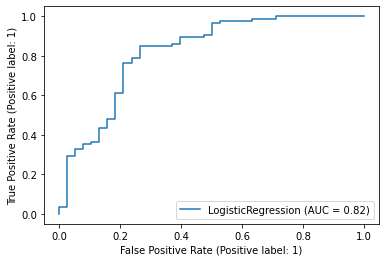

In [237]:
plot_roc_curve(final_model,X_test,y_test)

*  82% of the time model will be able to correctly predict loan Status approved as approved and rejected as rejected.

<hr>

In [238]:
# Precision Recall Study

In [239]:
conf=confusion_matrix(y_test,y_pred)


In [240]:

TP = conf[1][1]
TN = conf[0][0]
FP = conf[0][1]
FN = conf[1][0]

In [241]:
print('Accuracy is = ',(TP + TN) / (TP + TN + FP + FN))
print('\n')
print('Recall/True +ve Rate',TP / (TP + FN))
print('\n')
print('Precision/ Positive Prediction Value', TP / (TP + FP))
print('\n')
print('FPR',(FP/(FP+TN)))
print('\n')
print('FNR',(FN/(FN+TP)))

Accuracy is =  0.8211382113821138


Recall/True +ve Rate 0.9764705882352941


Precision/ Positive Prediction Value 0.8058252427184466


FPR 0.5263157894736842


FNR 0.023529411764705882


In [242]:
f1_score=2*((0.8058*0.9764)/(0.8058+0.9764))
f1_score

0.8829347099091011

>**Precision**
* out of all applicants that the model predicted would get loan approved only **80.58%** actually did
>**Recall**
* out of all applicants that actually did get loan approved, the model only predicted this outcome correctly for **97.64%** of those applicants
>**F1 Score**
* here f1 score = **88%**
* thus model did great job of predicting whether or not applicants get loan approved

#### To find best threshold

In [243]:
final_model.fit(X_train, y_train)

yhat = final_model.predict_proba(X_test )

#yhat

yhat = yhat[:, 1]#probability for positive outcome only.
yhat

array([0.6640653 , 0.74288855, 0.72731181, 0.64626971, 0.83548693,
       0.84513539, 0.08635008, 0.06219151, 0.85063068, 0.81730441,
       0.83140577, 0.75148791, 0.78200326, 0.06411244, 0.82735557,
       0.89216807, 0.82513583, 0.74088343, 0.84147756, 0.87125465,
       0.71911908, 0.05328127, 0.89786028, 0.89964045, 0.75010726,
       0.85921497, 0.73423842, 0.79123937, 0.76504425, 0.72097092,
       0.87612758, 0.8216235 , 0.75531084, 0.87472186, 0.81898497,
       0.81540852, 0.77234477, 0.07215769, 0.80934418, 0.86689663,
       0.82086382, 0.82240215, 0.61200863, 0.12337226, 0.05508534,
       0.6328168 , 0.7646815 , 0.65904241, 0.13861804, 0.06124413,
       0.79935825, 0.8129285 , 0.83666185, 0.5284901 , 0.61322034,
       0.68367468, 0.7717797 , 0.87970941, 0.61788381, 0.87569433,
       0.81966054, 0.87624043, 0.65397914, 0.81466007, 0.86705942,
       0.8190563 , 0.07446656, 0.87447564, 0.75271774, 0.67871696,
       0.8212248 , 0.81514122, 0.82396498, 0.89318686, 0.74893

In [244]:
from sklearn.metrics import roc_curve
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, yhat)
Jt = tpr - fpr
ix = argmax(Jt)
best_threshold = thresholds[ix]
print('Best Threshold=%f' % (best_threshold))

Best Threshold=0.719119


In [245]:
#we take threshold as 0.718626 as average to avoid further changes as it changes after each run of code

In [246]:
threshold=0.718626
y_pred_thresh=np.where(final_model.predict_proba(X_test)[:,1] > threshold, 1, 0) #

In [247]:
matrics=confusion_matrix(y_test,y_pred_thresh)
matrics

array([[28, 10],
       [13, 72]], dtype=int64)

* by applying threshold we are reduced Type 1 Error 
 i.e. false positive outcomes
* model predicted loan approved for actual loan rejected applicants this will be lose of bank so apply threshold so that model will predict loan rejected for some of them and type 1 error will reduced
Model Predicted out of 123 Applicants 103 Applicants Loan will be approved But Actually 85 applicants Loan is Approved
So When Threshold is 0.5 Model Predicted  20 Applicants Loan is Approved For Actually Rejected  Applicants . This is Type 1 Error And lose of Bank.
 Found Best threshold as 0.718 so that model will predict loan rejected for some of them and type 1 error will reduced
!

In [248]:
TP_= matrics[1][1]
TN_= matrics[0][0]
FP_= matrics[0][1]
FN_= matrics[1][0]

In [249]:
print('Accuracy is = ',((TP_ + TN_) / (TP_ + TN_ + FP_ + FN_)))
print('\n')
print('Recall/True +ve Rate',(TP_ / (TP_ + FN_)))
print('\n')
print('Specificity/True -ve Rate',(TN_ / (FP_ + TN_)))
print('\n')
print('Precision/ Positive Prediction Value', (TP_ / (TP_ + FP_)))
print('\n')
print('FPR',(FP_/(FP_+TN_)))
print('\n')
print('FNR',(FN_/(FN_+TP_)))

Accuracy is =  0.8130081300813008


Recall/True +ve Rate 0.8470588235294118


Specificity/True -ve Rate 0.7368421052631579


Precision/ Positive Prediction Value 0.8780487804878049


FPR 0.2631578947368421


FNR 0.15294117647058825


In [250]:
f1_score=2*((0.8765*0.8352)/(0.8765+0.8352))
f1_score

0.8553517555646433

<a id='Prediction_On_Given_Data'></a>

# Prediction on given data

In [251]:
df_new = pd.read_csv('D:\\Dataset\\test.csv')

### Data Preprocessing as per model

In [252]:
len(df_new)

367

In [253]:
df_new.shape

(367, 12)

In [254]:
df_new.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [255]:




df_new.duplicated().sum()

0

In [256]:
df_new.isna().sum()

Loan_ID                0
Sex                   11
Marital_Status         0
No_Dependents         10
Education_Status       0
Self_Employed         23
Income                 0
Coapplicant_Income     0
Loan_Amount            5
Tenure                 6
Credit_History        29
Property_Area          0
dtype: int64

In [257]:
df_new['Sex'].fillna(df_new['Sex'].mode()[0],inplace=True)       # 0  is to select first 

df_new['No_Dependents'].fillna(df_new['No_Dependents'].mode()[0],inplace=True)
df_new['Self_Employed'].fillna(df_new['Self_Employed'].mode()[0],inplace=True)
df_new['Loan_Amount'].fillna(df_new['Loan_Amount'].mode()[0],inplace=True)
df_new['Credit_History'].fillna(df_new['Credit_History'].mean(),inplace=True)
df_new['Tenure'].fillna(df_new['Tenure'].mean(),inplace=True)

In [258]:
df_new.isna().sum()

Loan_ID               0
Sex                   0
Marital_Status        0
No_Dependents         0
Education_Status      0
Self_Employed         0
Income                0
Coapplicant_Income    0
Loan_Amount           0
Tenure                0
Credit_History        0
Property_Area         0
dtype: int64

In [259]:
INC=np.percentile(df_new['Income'],q=[25,75])
print("Income",'\n','Q1 = ',INC[0],'Q3 = ',INC[1])
Income_q1=INC[0]
Income_q3=INC[1]
IQR_Income=Income_q3-Income_q1
print('IQR =',IQR_Income)
upper_income=Income_q3+(1.5*IQR_Income)
lower_income=Income_q1-(1.5*IQR_Income)
print('Upper Bound: ',upper_income,'Lower Bound: ',lower_income)

Income 
 Q1 =  2864.0 Q3 =  5060.0
IQR = 2196.0
Upper Bound:  8354.0 Lower Bound:  -430.0


In [260]:
df_new[(df_new['Income']>upper_income) | (df_new['Income']<lower_income)].head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.0,360.0,1.0,Urban
83,LP001446,Male,Yes,0,Graduate,No,8449,0,257.0,360.0,1.0,Rural


In [261]:
len(df_new[(df_new['Income']>upper_income) | (df_new['Income']<lower_income)])

32

In [262]:
co_INC=np.percentile(df_new['Coapplicant_Income'],q=[25,75])
print('Coapplicant Income','\n','Q1 = ',co_INC[0],'\n','Q3 = ',co_INC[1])
print('\n')
Coapplicant_Income_q1=co_INC[0]
Coapplicant_Income_q3=co_INC[1]
IQR_co_Income=Coapplicant_Income_q3-Coapplicant_Income_q1
print("IQR = ",IQR_co_Income)
upper_co_income=Coapplicant_Income_q3+(1.5*IQR_co_Income)
lower_co_income=Coapplicant_Income_q1-(1.5*IQR_co_Income)
print('Upper Bound =',upper_co_income,'Lower Bound=',lower_co_income)

Coapplicant Income 
 Q1 =  0.0 
 Q3 =  2430.5


IQR =  2430.5
Upper Bound = 6076.25 Lower Bound= -3645.75


In [263]:
df_new[(df_new['Coapplicant_Income']>upper_co_income) | (df_new['Coapplicant_Income']<lower_co_income)].head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural
85,LP001452,Male,Yes,2,Graduate,No,4635,8000,102.0,180.0,1.0,Rural
123,LP001652,Male,No,0,Graduate,No,2500,6414,187.0,360.0,0.0,Rural
230,LP002294,Male,No,0,Graduate,No,14911,14507,130.0,360.0,1.0,Semiurban


In [264]:
len(df_new[(df_new['Coapplicant_Income']>upper_co_income) | (df_new['Coapplicant_Income']<lower_co_income)])

8

In [265]:
df_new['TOT_INC']=(df_new['Income']+df_new['Coapplicant_Income'])
df_new['Loan_Amount']=df_new['Loan_Amount']*1000

In [266]:

df_new['EMI']= df_new.apply(lambda x: E_M_I(x.Loan_Amount,x.Tenure,r), axis = 1)
df_new['Balance']=df_new['TOT_INC']-df_new['EMI']

In [267]:
df_new['Balance']=df_new['Balance'].astype(int)
df_new['EMI']=df_new['EMI'].astype(int)

In [268]:
df_new=df_new[['Sex','Marital_Status','No_Dependents','Education_Status','Self_Employed','Property_Area','TOT_INC','Loan_Amount','Credit_History','Tenure','EMI','Balance']]

In [269]:
df_new['Sex'].replace({'Male':1,'Female':0},inplace=True)

df_new['Marital_Status'].replace({'Yes':1,'No':0},inplace=True)


df_new['No_Dependents'].replace({'0':0,'1':1,'2':2,'3+':4},inplace=True)


df_new['Education_Status'].replace({'Graduate':1,'Not Graduate':0},inplace=True)



df_new['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

df_new['Property_Area'].replace({'Semiurban':2,'Urban':1,'Rural':0},inplace=True)

In [270]:
df_new.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance
0,1,1,0,1,0,1,5720,110000.0,1.000000,360.0,965,4754
1,1,1,1,1,0,1,4576,126000.0,1.000000,360.0,1105,3470
2,1,1,2,1,0,1,6800,208000.0,1.000000,360.0,1825,4974
3,1,1,2,1,0,1,4886,100000.0,0.825444,360.0,877,4008
4,1,0,0,0,0,1,3276,78000.0,1.000000,360.0,684,2591


In [271]:
df.head()

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance,Loan_Status
0,1,0,0,1,0,1,5849.0,120000.0,1.0,360.0,1053,4795,1
1,1,1,1,1,0,0,6091.0,128000.0,1.0,360.0,1123,4967,0
2,1,1,0,1,1,1,3000.0,66000.0,1.0,360.0,579,2420,1
3,1,1,0,0,0,1,4941.0,120000.0,1.0,360.0,1053,3887,1
4,1,0,0,1,0,1,6000.0,141000.0,1.0,360.0,1237,4762,1


In [272]:
X_new = scaler.fit_transform(df_new)

In [273]:
final_predict=final_model.predict(X_new)
final_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

#### Applying Threshold

In [274]:


yhat = final_model.predict_proba(X_new)

#yhat

yhat_final = yhat[:, 1]#probability for positive outcome only.
yhat_final

array([0.83537284, 0.83376917, 0.82254976, 0.73531141, 0.73410017,
       0.8210667 , 0.81494349, 0.0644285 , 0.82875227, 0.80197638,
       0.73088763, 0.88024634, 0.69176588, 0.16488725, 0.82705918,
       0.75823994, 0.82457568, 0.88973745, 0.8084029 , 0.85164649,
       0.82332743, 0.78342116, 0.76087568, 0.72265224, 0.80439637,
       0.05205164, 0.7259385 , 0.80860573, 0.81438061, 0.78327854,
       0.80973028, 0.82573677, 0.822068  , 0.82653697, 0.835928  ,
       0.1014638 , 0.85032413, 0.85430461, 0.78084312, 0.75376414,
       0.83765179, 0.7585099 , 0.87040705, 0.81613954, 0.76460094,
       0.71390222, 0.80038211, 0.80457642, 0.74916812, 0.8792483 ,
       0.8337986 , 0.87310198, 0.88209097, 0.87058332, 0.83190602,
       0.07195344, 0.62749974, 0.90154145, 0.15907204, 0.90795265,
       0.86769576, 0.85011925, 0.81947788, 0.04938904, 0.81608045,
       0.88343057, 0.13947546, 0.16089715, 0.87744165, 0.07104789,
       0.83129166, 0.83749798, 0.86334466, 0.76097399, 0.86517

In [275]:
def thre(b):
    if b>0.718626:
        return(1)
    else:
        return(0)

In [276]:
df_new['final_predict']=final_predict.tolist()
df_new['yhat_f']=yhat_final.tolist()

In [277]:
df_new['thresh']= df_new.apply(lambda x: thre(x.yhat_f), axis = 1)


<hr>

In [278]:
thresh=np.array(df_new['thresh'])

In [279]:
df_new['final_predict'].value_counts()

1    308
0     59
Name: final_predict, dtype: int64

In [280]:
df_new['thresh'].value_counts()

1    268
0     99
Name: thresh, dtype: int64

In [281]:
confusion_matrix(final_predict,thresh)

array([[ 59,   0],
       [ 40, 268]], dtype=int64)

after applying threshold 40 applicants loan will be rejected

Out of 367 Applicants 

>By Default Threshold  
* 59 Applicants Loan will be Rejected
* 308 Applicants Loan Will Be Approved

> But If we apply threshold as 0.718 
* 99 Applicants Loan will be Rejected
* 268 Applicants Loan Will Be Approved

<hr>

In [282]:
len(yhat)

367

In [283]:
len(final_predict)

367

In [284]:
df_new.columns

Index(['Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Property_Area', 'TOT_INC', 'Loan_Amount',
       'Credit_History', 'Tenure', 'EMI', 'Balance', 'final_predict', 'yhat_f',
       'thresh'],
      dtype='object')

In [285]:
df_new1=df_new.drop(['TOT_INC', 'Loan_Amount','Tenure', 'EMI','final_predict', 'yhat_f'],axis=1)

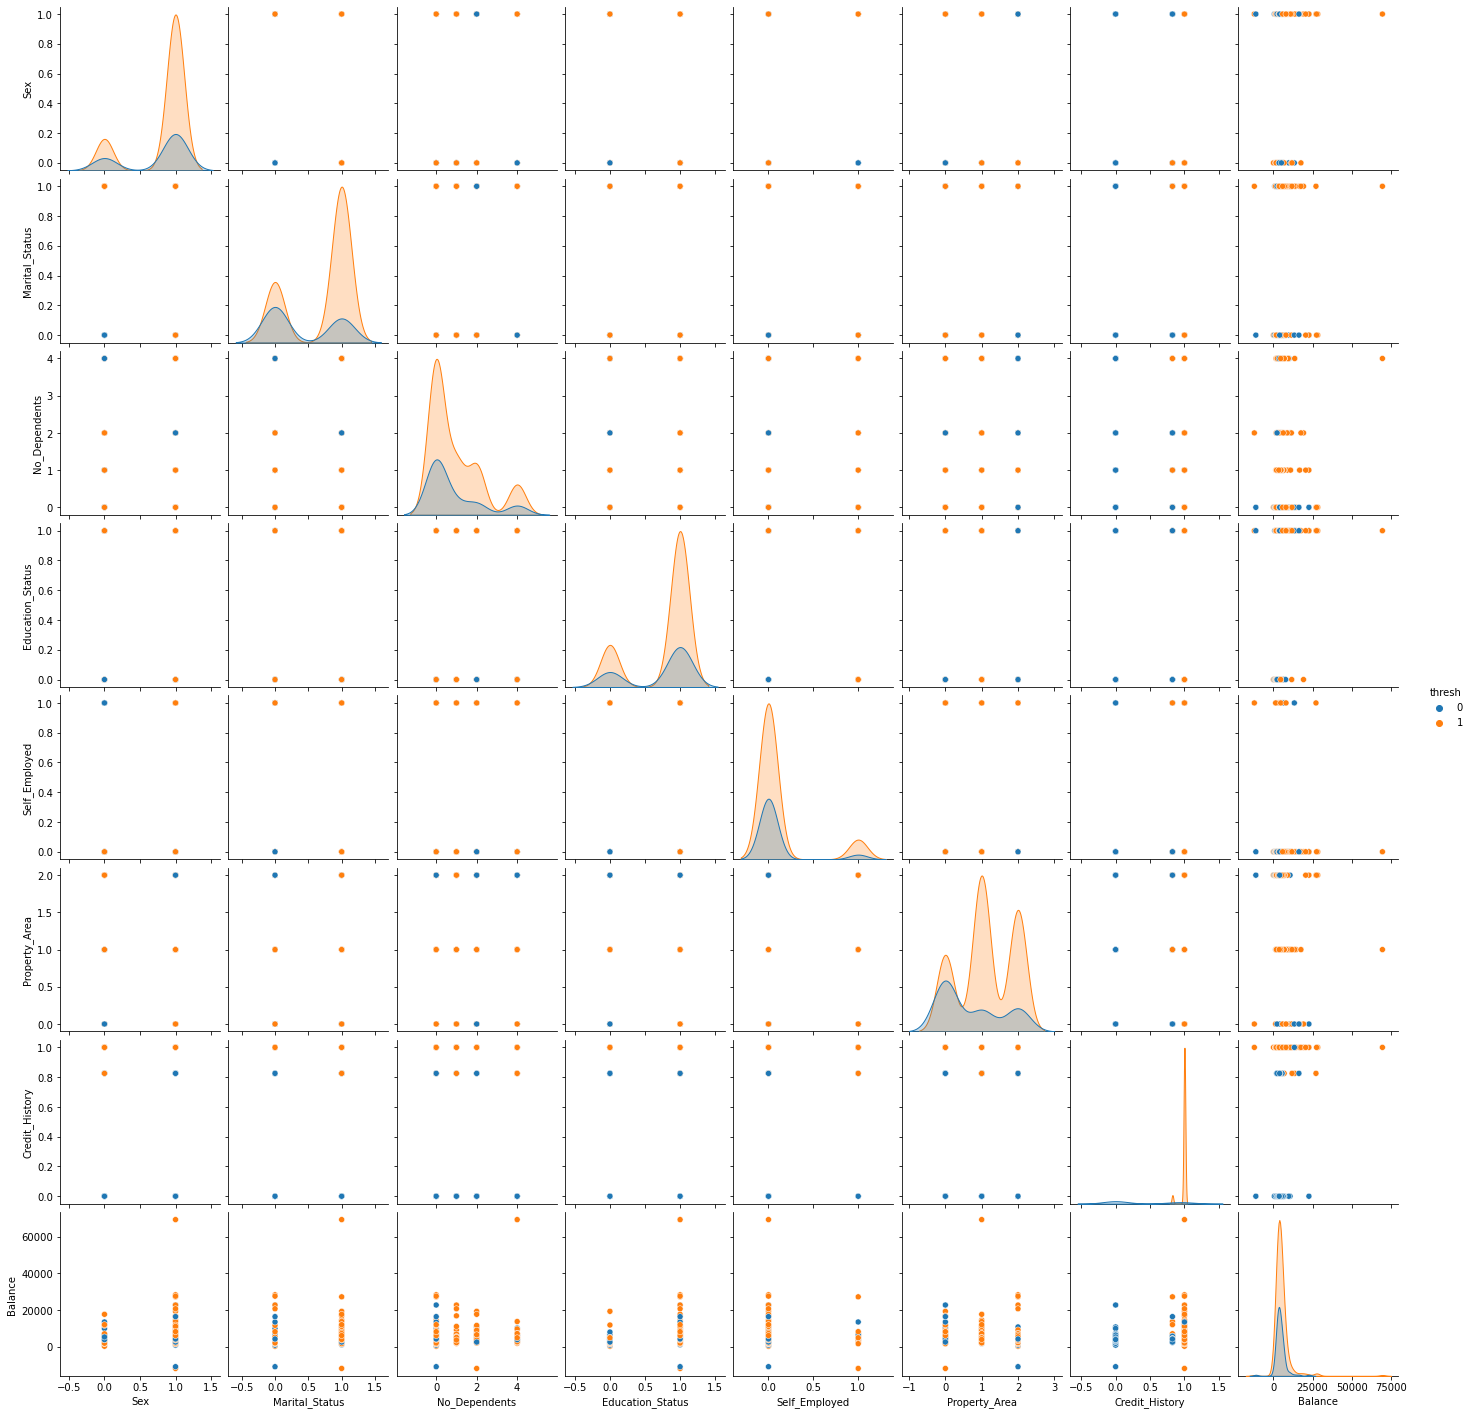

In [286]:
sns.pairplot(df_new1,hue='thresh')

<AxesSubplot:>

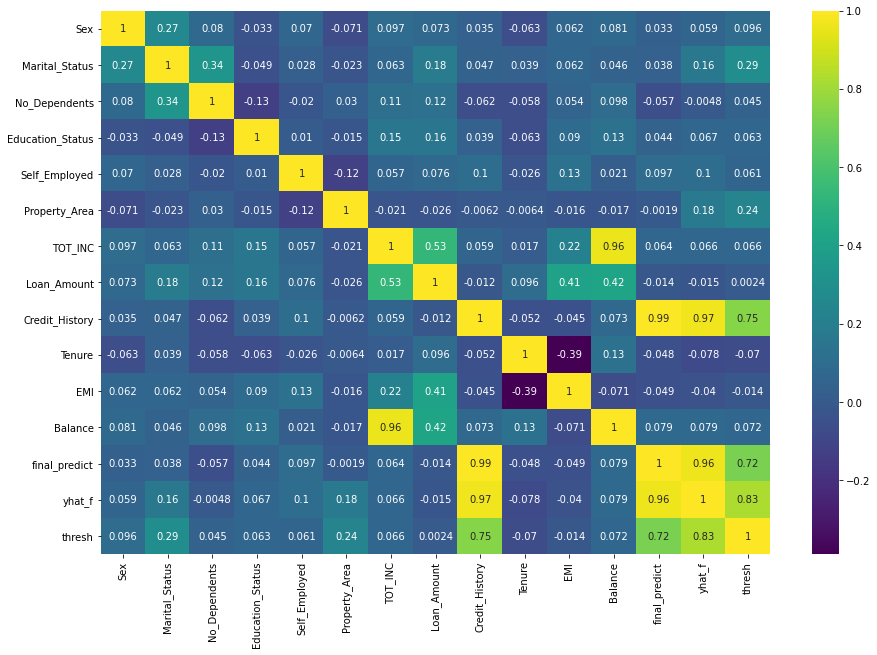

In [287]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),cmap='viridis',annot=True)

* threshold is highly correleted with credit history greater the credit history greater the thresh and obviously loan approval chances are more

In [288]:
len(df_new[(df_new['final_predict']==1) & (df_new['thresh']==0)])


40

In [289]:
Rejected_Applicants=df_new[(df_new['final_predict']==1) & (df_new['thresh']!=1)]
Rejected_Applicants

,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Property_Area,TOT_INC,Loan_Amount,Credit_History,Tenure,EMI,Balance,final_predict,yhat_f,thresh
12,1,0,4,1,0,1,4166,40000.0,0.825444,180.000000,429,3736,1,0.691766,0
45,1,1,0,1,0,1,8160,185000.0,0.825444,342.537396,1637,6522,1,0.713902,0
56,0,0,0,0,0,0,4402,130000.0,1.000000,360.000000,1140,3261,1,0.627500,0
77,1,0,0,1,1,0,6356,50000.0,1.000000,360.000000,438,5917,1,0.716086,0
89,0,0,0,1,0,0,5058,200000.0,1.000000,360.000000,1755,3302,1,0.646377,0
90,1,1,0,1,1,0,5474,130000.0,0.825444,360.000000,1140,4333,1,0.656024,0
91,1,1,4,1,0,0,13518,390000.0,1.000000,360.000000,3422,10095,1,0.717417,0
100,1,0,0,1,0,0,4452,131000.0,1.000000,360.000000,1149,3302,1,0.665678,0
131,1,0,0,1,0,0,3391,132000.0,1.000000,360.000000,1158,2232,1,0.664154,0
152,1,0,0,1,0,0,5000,148000.0,1.000000,360.000000,1298,3701,1,0.661439,0


In [290]:
len(Rejected_Applicants)


40

In [291]:
Rejected_Applicants.columns

Index(['Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Property_Area', 'TOT_INC', 'Loan_Amount',
       'Credit_History', 'Tenure', 'EMI', 'Balance', 'final_predict', 'yhat_f',
       'thresh'],
      dtype='object')

In [292]:
Rejected_Applicants['Marital_Status'].value_counts()

0    35
1     5
Name: Marital_Status, dtype: int64

In [293]:
35/40

0.875

* Not married aaplicants have 87.5%chances of getting loan rejected

In [294]:
Rejected_Applicants['Sex'].value_counts()

1    28
0    12
Name: Sex, dtype: int64

In [295]:
Rejected_Applicants['No_Dependents'].value_counts()

0    31
1     5
2     2
4     2
Name: No_Dependents, dtype: int64

In [296]:
29/40

0.725

* applicants with 0 dependents have 72% chances of loan rejection

In [297]:
len(Rejected_Applicants[(Rejected_Applicants['Marital_Status']=='Yes') & (Rejected_Applicants['Sex']=='Male')])


0

### Predicted Output with Loan ID

In [298]:
df_final = pd.read_csv('D:\\Dataset\\test.csv')

In [299]:
df_final['Loan_status_by_Model_0.5thresh']=final_predict.tolist()
df_final['yhat_f']=yhat_final.tolist()
df_final['Loan_status_by0.725_thresh']= df_new.apply(lambda x: thre(x.yhat_f), axis = 1)


In [300]:
df_final.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_status_by_Model_0.5thresh,yhat_f,Loan_status_by0.725_thresh
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,0.835373,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,0.833769,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,0.822550,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1,0.735311,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1,0.734100,1


In [301]:
df_final['Loan_status_by_Model_0.5thresh'].replace({1:'Yes',0:'No'},inplace=True)
df_final['Loan_status_by0.725_thresh'].replace({1:'Yes',0:'No'},inplace=True)

In [302]:
df_predicted=df_final[['Loan_ID','Loan_status_by_Model_0.5thresh','yhat_f','Loan_status_by0.725_thresh']]

In [303]:
df_predicted.head()

,Loan_ID,Loan_status_by_Model_0.5thresh,yhat_f,Loan_status_by0.725_thresh
0,LP001015,Yes,0.835373,Yes
1,LP001022,Yes,0.833769,Yes
2,LP001031,Yes,0.822550,Yes
3,LP001035,Yes,0.735311,Yes
4,LP001051,Yes,0.734100,Yes


In [304]:
df_predicted.to_excel('C:\\Users\\Administrator\\Documents\\Loan_ID&Status.xlsx') #excel 